Import Statements
---

In [ ]:
!pip install biopython # otherwise the data_prep_functions will not be imported!

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 57.9 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
import os
import sys

drive.mount('/content/drive', force_remount=True)
data_prep_path = '/content/drive/MyDrive/Predicting_the_Protein_Corona_Vijgen/'
sys.path.append(data_prep_path)

from data_prep_functions import *

import threading
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pprint
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from scipy.stats import  spearmanr
from sklearn.model_selection import KFold, train_test_split, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.feature_selection import RFE, RFECV
from sklearn.model_selection import StratifiedKFold

Mounted at /content/drive
test!


Data Preparation
--
Linking to DataFrame(s) of interest

In [ ]:
# Specify input directory filepath
input_directory = '/content/drive/MyDrive/Predicting_the_Protein_Corona_Vijgen/Input_DataFrames/'

# Initialize an empty list to store Excel file paths
excel_files = []

# Iterate over the files in the directory
for file in os.listdir(input_directory):
    # Check if the file is an Excel file
    if file.endswith('.xlsx'):
        # Get the full path of the Excel file
        file_path = os.path.join(input_directory, file)
        # Append the file path to the list
        excel_files.append(file_path)

# Print the list of Excel file paths to verify proper list appending
print(excel_files)

['/content/drive/MyDrive/Predicting_the_Protein_Corona_Vijgen/Input_DataFrames/df_Bov Swiss Intensity.xlsx', '/content/drive/MyDrive/Predicting_the_Protein_Corona_Vijgen/Input_DataFrames/df_Bov Swiss Top3.xlsx', '/content/drive/MyDrive/Predicting_the_Protein_Corona_Vijgen/Input_DataFrames/df_Bov Swiss iBAQ.xlsx', '/content/drive/MyDrive/Predicting_the_Protein_Corona_Vijgen/Input_DataFrames/df_Bov Swiss + TrEMBLE Intensity.xlsx', '/content/drive/MyDrive/Predicting_the_Protein_Corona_Vijgen/Input_DataFrames/df_Bov Swiss + TrEMBLE Top3.xlsx', '/content/drive/MyDrive/Predicting_the_Protein_Corona_Vijgen/Input_DataFrames/df_Bov Swiss + TrEMBLE iBAQ.xlsx']


DataFrame Clean Up


*   Remove zeros and NaN
*   Replace with the second lowest found value for Abundance



In [ ]:
# Iterate over each Excel file
for file in excel_files:
    # Read the Excel file into a DataFrame
    df = pd.read_excel(file, header=0)

    # Get the minimum control value
    Min_Control = df['Abundance_Controls'].drop_duplicates().nsmallest(2).iloc[-1]
    # Replace 0 values in 'Abundance_Controls' column with the second-smallest value
    df['Abundance_Controls'].replace(0, Min_Control, inplace=True)

    # Filter out rows with abundance values below zero
    Min_Abundance = df['Abundance'].drop_duplicates().nsmallest(2).iloc[-1]
    df = df[df['Abundance'] >= Min_Abundance]

    # Extract the filename without extension
    file_name = os.path.splitext(os.path.basename(file))[0]

    # Specify the output file path with the current filename included
    output_file_path = os.path.join('/content/drive/MyDrive/Predicting_the_Protein_Corona_Vijgen/Input_DataFrames/post_clean_up_dfs', f'{file_name}.xlsx')
    df.to_excel(output_file_path, index=False)

Initial Model Training & Important Feature Determination
--

Initializing Standard Pipeline - Threaded

In [ ]:
# Specify input directory filepath
input_directory = '/content/drive/MyDrive/Predicting_the_Protein_Corona_Vijgen/Input_DataFrames/post_clean_up_dfs/'

# Initialize an empty list to store Excel file paths
processed_files = []

# Iterate over the files in the directory
for file in os.listdir(input_directory):
    # Check if the file is an Excel file
    if file.endswith('.xlsx'):
        # Get the full path of the Excel file
        file_path = os.path.join(input_directory, file)
        # Append the file path to the list
        processed_files.append(file_path)

# Print the list of Excel file paths to verify proper list appending
print(processed_files)

['/content/drive/MyDrive/Predicting_the_Protein_Corona_Vijgen/Input_DataFrames/post_clean_up_dfs/df_Bov Swiss Intensity.xlsx', '/content/drive/MyDrive/Predicting_the_Protein_Corona_Vijgen/Input_DataFrames/post_clean_up_dfs/df_Bov Swiss Top3.xlsx', '/content/drive/MyDrive/Predicting_the_Protein_Corona_Vijgen/Input_DataFrames/post_clean_up_dfs/df_Bov Swiss iBAQ.xlsx', '/content/drive/MyDrive/Predicting_the_Protein_Corona_Vijgen/Input_DataFrames/post_clean_up_dfs/df_Bov Swiss + TrEMBLE Intensity.xlsx', '/content/drive/MyDrive/Predicting_the_Protein_Corona_Vijgen/Input_DataFrames/post_clean_up_dfs/df_Bov Swiss + TrEMBLE Top3.xlsx', '/content/drive/MyDrive/Predicting_the_Protein_Corona_Vijgen/Input_DataFrames/post_clean_up_dfs/df_Bov Swiss + TrEMBLE iBAQ.xlsx']


Specifying directory and files to be used in model

In [ ]:
# For shorter computing time, run one file at a time
input_directory = '/content/drive/MyDrive/Predicting_the_Protein_Corona_Vijgen/Input_DataFrames/post_clean_up_dfs/'

file_beginning = 'df_'
file_group = 'Bov Swiss'  # options are 'Bov Swiss', Ignore: 'Bov Swiss + TrEMBLE'
file_ending = ' Intensity.xlsx'  # options are ' Intensity.xlsx', ' Top3.xlsx', ' iBAQ.xlsx'
target_file = file_beginning + file_group + file_ending  # This constructs the exact target file name

files = []

for file in os.listdir(input_directory):
    if file == target_file:  # Use exact match instead of partial matches
        files.append(file)

print(files)

['df_Bov Swiss Intensity.xlsx']


RFECV

df_Bov Swiss + TrEMBLE Intensity
start df_Bov Swiss + TrEMBLE Intensity
n_features_to_select 80
n_features_to_select 79
n_features_to_select 78
n_features_to_select 77
n_features_to_select 76
n_features_to_select 75
n_features_to_select 74
n_features_to_select 73
n_features_to_select 72
n_features_to_select 71
n_features_to_select 70
n_features_to_select 69
n_features_to_select 68
n_features_to_select 67
n_features_to_select 66
n_features_to_select 65
n_features_to_select 64
n_features_to_select 63
n_features_to_select 62
n_features_to_select 61
n_features_to_select 60
n_features_to_select 59
n_features_to_select 58
n_features_to_select 57
n_features_to_select 56
n_features_to_select 55
n_features_to_select 54
n_features_to_select 53
n_features_to_select 52
n_features_to_select 51
n_features_to_select 50
n_features_to_select 49
n_features_to_select 48
n_features_to_select 47
n_features_to_select 46
n_features_to_select 45
n_features_to_select 44
n_features_to_select 43
n_features_to_se

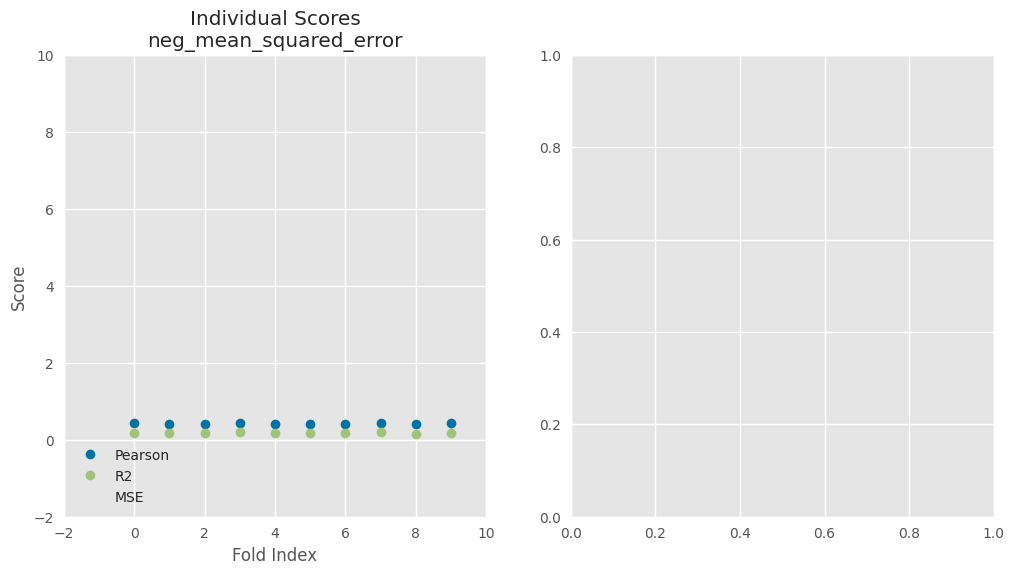

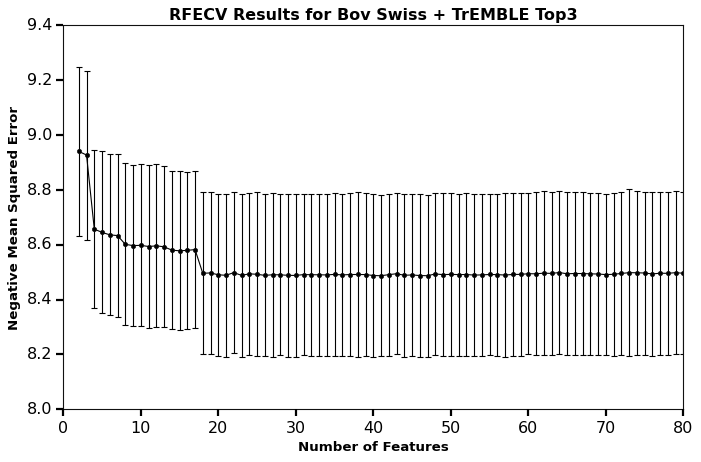

df_Bov Swiss + TrEMBLE Intensity done
All files processed!


In [ ]:
# Function to be run in each thread
def process_file(in_df, name):
    # Initialize a RandomForestRegressor model with 100 estimators
    model = RandomForestRegressor(n_estimators=100)

    # Read the input DataFrame
    df = pd.read_excel(in_df, header=0)
    df_original = df.copy()  # Save a copy of the original DataFrame for later use

    # 'Abundance' column in df represents a 1D array of target values (class labels)
    y_label = np.log2(df['Abundance'].to_numpy().astype(float))

    # Remove columns in df that should not be considered as potential features in RFE & RFECV
    columns_to_drop = [col for col in ['Abundance', 'NPUNID', 'NPID', 'Entry', 'Sequence', 'Sample_num', 'Raw_FileID',
                                       'Ligands', 'BatchID', 'Protein Source'] if col in df.columns]
    df.drop(columns=columns_to_drop, inplace=True)

    # RFECV Variables
    identifier = 'neg_mean_squared_error'
    keep_columns = ['Abundance', 'NPUNID', 'Entry']
    n_splits = 10 # 90/10 train/test split currently
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

    # Define the range of features to select
    max_features = df.shape[1] # equal to number of columns in df
    min_features = 1

    selected_features = None
    current_score = float(100)

    df_full_results = pd.DataFrame({"Number of features": [],
                                    "Avg neg_mean_squared_err": [],
                                    "Std dev": [],
                                    "List of features": [],
                                    "Combined Score": []})
    print('start', name)

    for n_features_to_select in range(max_features, min_features, -1):
        print('n_features_to_select', n_features_to_select)
        avg_accuracies = []

        # Make a dictionary with feature name keys
        feat_dict = {key: 0 for key in df.columns}

        for train_index, test_index in kf.split(df):
            # Assert statement used to ensure no train/test split overlap
            assert len(set(train_index) & set(test_index)) == 0, "Overlap found between training and testing sets"

            X_train, X_test = df.iloc[train_index], df.iloc[test_index]
            y_train, y_test = y_label[train_index], y_label[test_index]

            # Train the classifier
            model.fit(X_train, y_train)

            # Evaluate on validation set
            y_pred=model.predict(X_test)
            accuracy = mean_squared_error(y_pred, y_test)
            avg_accuracies.append(accuracy)

            # At each iteration, each feature will get an importance
            for idx, feature in enumerate(df.columns):
                feat_dict[feature] += model.feature_importances_[idx]

        # Compute average accuracy across all folds
        avg_accuracy = np.mean(avg_accuracies)
        std_dev = np.std(avg_accuracies)

        # If this is the best combo, save it
        combined_score = avg_accuracy + std_dev + (n_features_to_select / 5000)
        df_full_results.loc[len(df_full_results)] = [n_features_to_select, avg_accuracy, std_dev, ", ".join(df.columns),combined_score]

        # Drop the feature with the lowest importance sum
        df = df[[key for key in feat_dict if key != min(feat_dict, key=feat_dict.get)]]

        if combined_score < current_score:
            current_score = combined_score
            # Selecting the best features of the current df
            best_features = df.columns.tolist()

    print("Best Feature Names:", best_features)

    # Save RFECV results and scores
    df_full_results.to_csv(f'/content/drive/MyDrive/Predicting_the_Protein_Corona_Vijgen/Output_DataFrames/RFR/Bovine Swiss + Tremble iBAQ/RFECV_RFR_results_{name}.csv', index=False)
    feat_list = best_features + keep_columns

    # Run scorer to determine feature importance and metrics for each df
    df = df_original[best_features].copy()
    RFR_scores, feats = scorer(df, y_label, model, identifier=identifier, folds=n_splits)

    feats.to_excel(f'/content/drive/MyDrive/Predicting_the_Protein_Corona_Vijgen/Output_DataFrames/RFR/Bovine Swiss + Tremble iBAQ/Feats_RFECV_{name}.xlsx', index=False)

    RFR_scores.to_excel(f'/content/drive/MyDrive/Predicting_the_Protein_Corona_Vijgen/Output_DataFrames/RFR/Bovine Swiss + Tremble iBAQ/Scores_RFECV_{name}.xlsx', index=False)

    df_RFECV = df_original[feat_list].copy()
    df_RFECV.to_csv(f'/content/drive/MyDrive/Predicting_the_Protein_Corona_Vijgen/Output_DataFrames/RFR/Bovine Swiss + Tremble iBAQ/df_RFECV_RFR_{name}.csv', index=False)

    # Compute feature importances and print them
    feature_importances = model.feature_importances_
    normalized_importances = 100.0 * (feature_importances / feature_importances.sum())
    feature_importance_df = pd.DataFrame({'Feature': best_features, 'Importance': normalized_importances})
    print(feature_importance_df)

    # Plot RFECV results
    plt.style.use('classic')

    # Creating a figure and axes object using subplots for better control
    fig, ax = plt.subplots(figsize=(10, 6), facecolor='white')

    # Plotting the data using the axes object
    ax.errorbar(df_full_results["Number of features"], df_full_results["Avg neg_mean_squared_err"],
            yerr=df_full_results["Std dev"], fmt='-o', color="black",
            elinewidth=1, capsize=3, capthick=1, markersize=4)

    # Setting labels and title with customized options
    ax.set_xlabel('Number of Features', fontweight='bold', color='black')
    ax.set_ylabel('Negative Mean Squared Error', fontweight='bold', color='black')

    # CHANGE TITLE NAME FOR PROPER PUBLICATION FORMAT
    ax.set_title(f'RFR Model: RFECV Results for Bovine Swiss-Prot Intensity', fontweight='bold', color='black')

    # Adjusting the tick parameters to match the RFC plot style
    ax.tick_params(axis='both', which='both', direction='out',
               length=6, width=2, colors='black',
               labelsize='large', labelcolor='black',
               bottom=True, top=False, left=True, right=False)

    # Removing the grid for consistency with RFC plot styling
    ax.grid(False)

    # Saving the plot to the specified path
    plt.savefig(f'/content/drive/MyDrive/Predicting_the_Protein_Corona_Vijgen/Output_DataFrames/RFR/Bovine Swiss + Tremble iBAQ/RFECV_plot_{name}.png')
    plt.show()
    plt.close()

    print(name, 'done')

# Initialize an empty list to store threads
threads = []

# Iterate over the files in the directory
for file in os.listdir(input_directory):
    if file.endswith('.xlsx') and file in files:
        # Get the full path of the Excel file
        file_path = os.path.join(input_directory, file)

        # Isolate the name by splitting the path and extracting the last part without the file extension
        name = os.path.basename(file_path).rsplit('.', 1)[0]
        print(name)

        # Create a thread that runs process_file on each Excel file
        thread = threading.Thread(target=process_file, args=(file_path, name))

        # Append the thread to the list and start it
        threads.append(thread)
        thread.start()

# Wait for all threads to complete
for thread in threads:
    thread.join()

print("All files processed!")

Predicting - Protein
----

Specifying directory and files to be used in protein prediction model

Currently setup to train and test on FBS protein only, no predicting across proteomes yet.

In [ ]:
# Want the file that contains the previously determined important features
input_directory = '/content/drive/MyDrive/Predicting_the_Protein_Corona_Vijgen/Output_DataFrames/RFR/Bovine Swiss + Tremble iBAQ' # RFR folder in Output_DataFrames

file_beginning = 'df_RFECV_RFR_'
file_group = 'Bov Swiss' # options are 'Bov Swiss', Ignore: 'Bov Swiss + TrEMBLE
file_ending = 'Intensity.csv' # options are 'Intensity.csv', 'Top3.csv', 'iBAQ.csv'
files = []

for file in os.listdir(input_directory):
    if file.startswith(file_beginning) and file_group in file and file_ending in file:
        files.append(file)

print("Original CSV files:", files)

# Convert items in files list to .xlsx file type
for i, csv_file in enumerate(files):
    file_path = os.path.join(input_directory, csv_file)  # Full path to the CSV file
    df = pd.read_csv(file_path)  # Read the CSV file into a DataFrame

    # Construct Excel file name
    excel_file = csv_file.replace('.csv', '.xlsx')
    excel_path = os.path.join(input_directory, excel_file)  # Full path to the Excel file

    # Save the DataFrame to an Excel file
    df.to_excel(excel_path, index=False)  # Set index=False to not write row indices

    # Update the file name in the list
    files[i] = excel_file

    print(f'Converted {csv_file} to {excel_file}')

# Print the updated list of files, now with .xlsx extensions
print("Updated list with Excel files:", files)

Original CSV files: ['df_RFECV_RFR_df_Bov Swiss + TrEMBLE Intensity.csv']
Converted df_RFECV_RFR_df_Bov Swiss + TrEMBLE Intensity.csv to df_RFECV_RFR_df_Bov Swiss + TrEMBLE Intensity.xlsx
Updated list with Excel files: ['df_RFECV_RFR_df_Bov Swiss + TrEMBLE Intensity.xlsx']


/content/drive/MyDrive/Predicting_the_Protein_Corona_Vijgen/Output_DataFrames/RFR/New MQ/df_RFECV_RFR_df_Bov Swiss + TrEMBLE Intensity.xlsx
df_RFECV_RFR_df_Bov Swiss + TrEMBLE Intensity
['Abundance_Controls', 'Length', 'frac_aa_A', 'frac_aa_C', 'frac_aa_F', 'frac_aa_Q', 'frac_aa_V', 'secondary_structure_fraction_sheet', 'fraction_exposed', 'fraction_exposed_nonpolar_total', 'fraction_exposed_exposed_H', 'fraction_exposed_exposed_K', 'fraction_exposed_exposed_T', 'nsp_secondary_structure_coil', 'nsp_secondary_structure_helix', 'Zeta Potential', 'Dtem', 'Dh_functionalized', 'Incubation Concentration (mg/ml)']
Pearson: 0.43505503411580193
Spearman: 0.344671627520443
R-squared: 0.18809779947529404
Mean Squared Error: 8.200474045958376


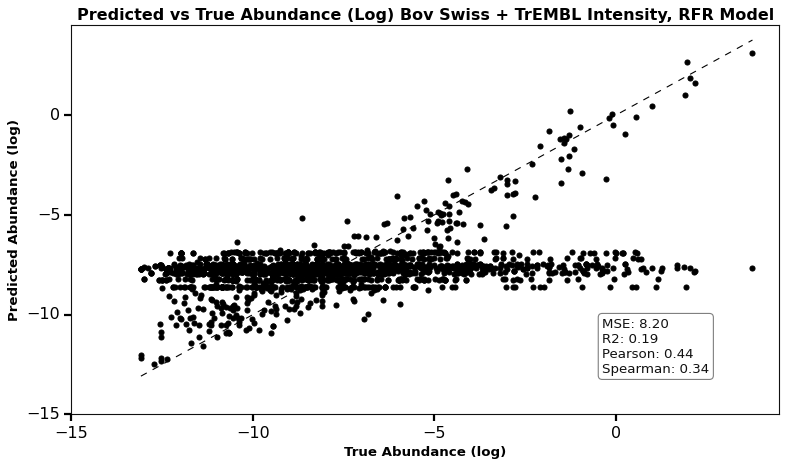

Exception in thread Thread-16 (predict_file):
Traceback (most recent call last):
  File "/usr/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.10/threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-10-b32334655b94>", line 85, in predict_file
  File "/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py", line 1023, in savefig
    res = fig.savefig(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/matplotlib/figure.py", line 3343, in savefig
    self.canvas.print_figure(fname, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/matplotlib/backend_bases.py", line 2366, in print_figure
    result = print_method(
  File "/usr/local/lib/python3.10/dist-packages/matplotlib/backend_bases.py", line 2232, in <lambda>
    print_method = functools.wraps(meth)(lambda *args, **kwargs: meth(
  File "/usr/local/lib/python3.10/dist-packages/matplotlib/backends/backend_agg.py

All files processed!


<Figure size 2400x1800 with 0 Axes>

In [ ]:
def predict_file(in_df, name):
  # Initialize a RandomForestRegressor model with 100 estimators
    model = RandomForestRegressor(n_estimators=100)

    # Read the input DataFrame
    df = pd.read_excel(in_df, header=0)
    df_original = df.copy()  # Save a copy of the original DataFrame for later use

    # Filter out rows with abundance values below zero
    #Min_Abundance = df['Abundance'].drop_duplicates().nsmallest(2).iloc[-1]
    #df = df[df['Abundance'] >= Min_Abundance]

    # X is df and y is 'Abundance' column in df
    # 'Abundance' column in df represents a 1D array of target values (class labels)
    y_label = np.log2(df['Abundance'].to_numpy().astype(float))

    # Remove unnecessary columns
    columns_to_drop = [col for col in ['Abundance', 'NPUNID', 'Entry'] if col in df.columns]
    df.drop(columns=columns_to_drop, inplace=True)

    # List of features for RFR model
    selected_features = df.columns.tolist()
    print(selected_features)

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(df, y_label, test_size=0.1, random_state=42)

    # Train the classifier
    model.fit(X_train, y_train)

    # Evaluate on validation set
    y_pred=model.predict(X_test)

    # Calculate evaluation metrics
    pearson, _ = pearsonr(y_test, y_pred)
    spearman, _ = spearmanr(y_test, y_pred)
    r_squared = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    print("Pearson:", pearson)
    print("Spearman:", spearman)
    print("R-squared:", r_squared)
    print("Mean Squared Error:", mse)

    #Create a scatter plot of true vs predicted values
    plt.style.use('classic')

    # Create the figure and axes object with specific figure size and background color
    fig, ax = plt.subplots(figsize=(10, 6), facecolor='white')

    # Set the figure resolution
    plt.rcParams['figure.dpi'] = 300

    # Plotting the scatter data with customized color and plot line for identity
    ax.scatter(y_test, y_pred, color='black', s=20)  # Adjust marker size with `s`
    ax.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='black')  # Identity line

    # Setting labels and title with customized options
    ax.set_xlabel('True Abundance (log)', fontweight='bold', color='black')
    ax.set_ylabel('Predicted Abundance (log)', fontweight='bold', color='black')
    # SET TITLE FOR PROPER PUBLICATION FORMAT
    ax.set_title(f'Predicted vs True Abundance (Log) Bov Swiss + TrEMBL Intensity, RFR Model', fontweight='bold', color='black')

    # Adjusting the tick parameters to match the RFC plot style
    ax.tick_params(axis='both', which='both', direction='out',
               length=6, width=2, colors='black',
               labelsize='large', labelcolor='black',
               bottom=True, top=False, left=True, right=False)
    ax.set_xlim(left=-15, right=4.5)
    ax.set_ylim(bottom=-15, top=4.5)

    # Add a metrics box to the plot with adjusted styling to match the cleaner look
    box_text = f"MSE: {mse:.2f}\nR2: {r_squared:.2f}\nPearson: {pearson:.2f}\nSpearman: {spearman:.2f}"
    props = dict(boxstyle='round', facecolor='white', alpha=0.5, edgecolor='black')
    ax.text(0.75, 0.10, box_text, transform=ax.transAxes, fontsize=12, verticalalignment='bottom', bbox=props)

    # Remove grid lines for consistency with the first plot's style
    ax.grid(False)

    # Ensure the layout fits the plot and no clipping occurs
    plt.tight_layout()

    # Display the plot
    plt.show()

    # Save the plot
    plt.savefig(f'/content/drive/MyDrive/Predicting_the_Protein_Corona_Vijgen/Output_DataFrames/RFR/{name}.png')
    plt.show()

    # Close the plot explicitly to free up memory
    plt.close()



        # NEED TO SAVE: evaluation metrics to excel file


# Initialize an empty list to store threads
threads = []

# Iterate over the files in the directory
for file in os.listdir(input_directory):
    if file.endswith('.xlsx') and file in files:
        # Get the full path of the Excel file
        file_path = os.path.join(input_directory, file)
        print(file_path)

        # Isolate the name by splitting the path and extracting the last part without the file extension
        name = os.path.basename(file_path).rsplit('.', 1)[0]
        print(name)

        # Create a thread that runs process_file on each Excel file
        thread = threading.Thread(target=predict_file, args=(file_path, name))

        # Append the thread to the list and start it
        threads.append(thread)
        thread.start()

# Wait for all threads to complete
for thread in threads:
    thread.join()

print("All files processed!")

Predicting - Nanoparticle
---


Predicting NP information; correlations made with NPUNID IDs

[21, 19, 32, 33, 24, 30, 27, 29, 25, 34, 28, 18, 35, 20, 17, 26, 22, 23, 31]


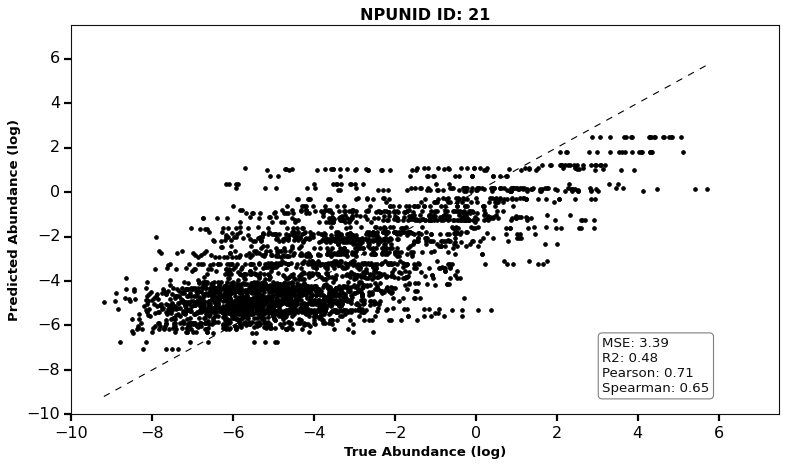

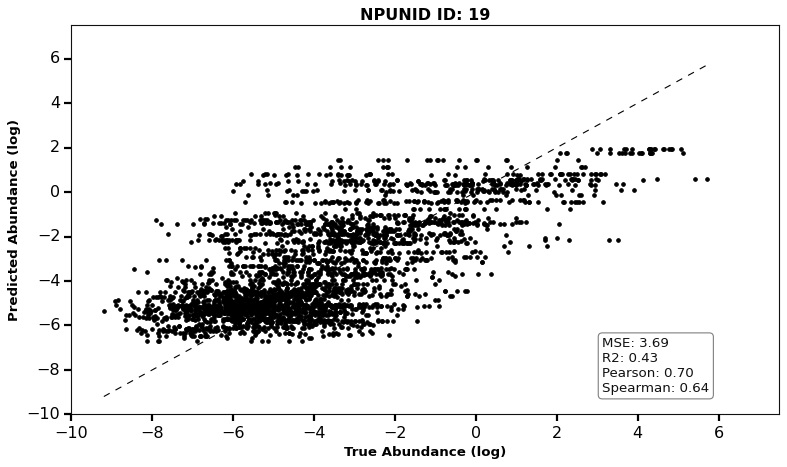

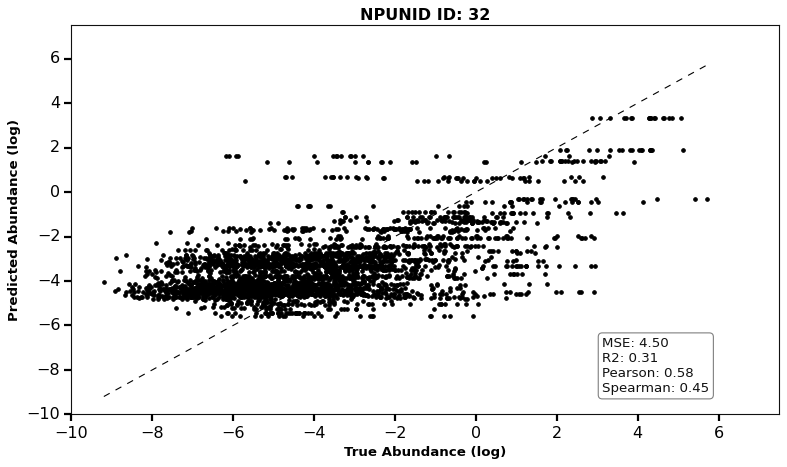

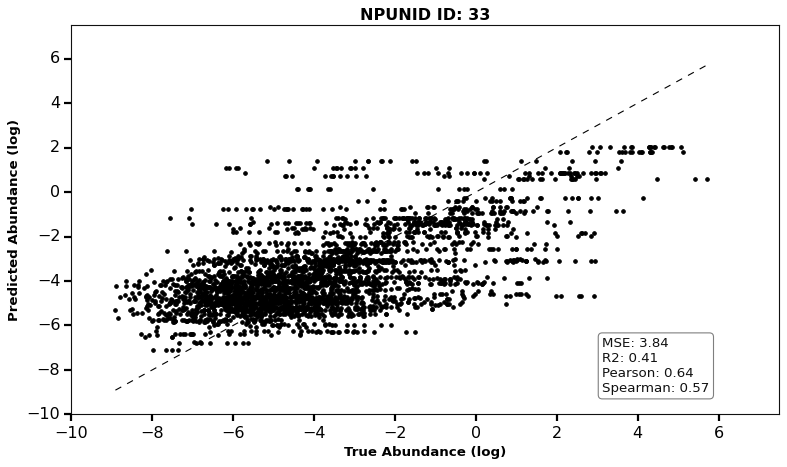

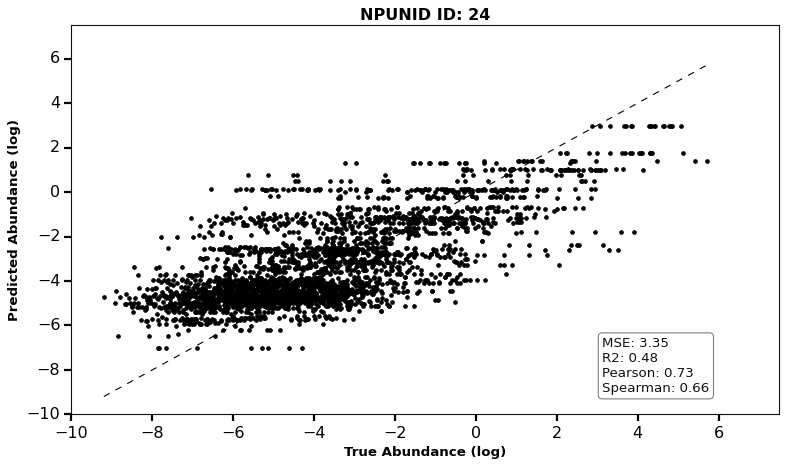

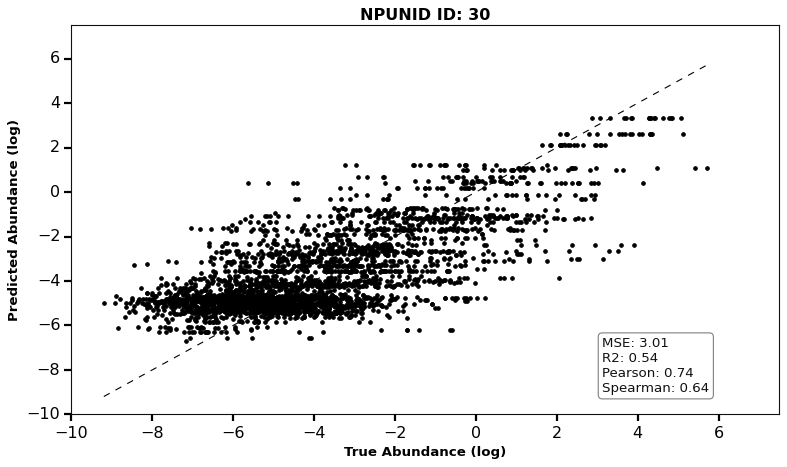

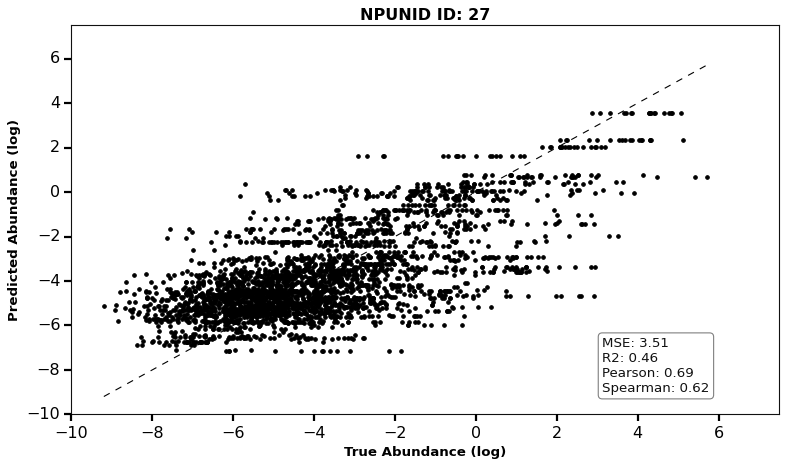

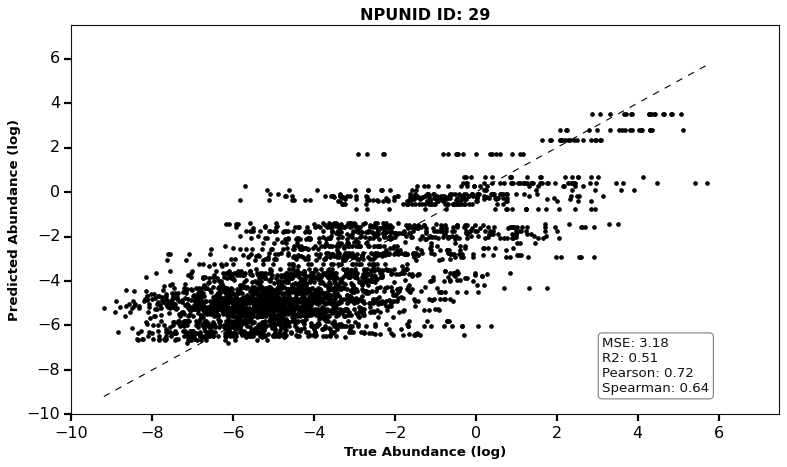

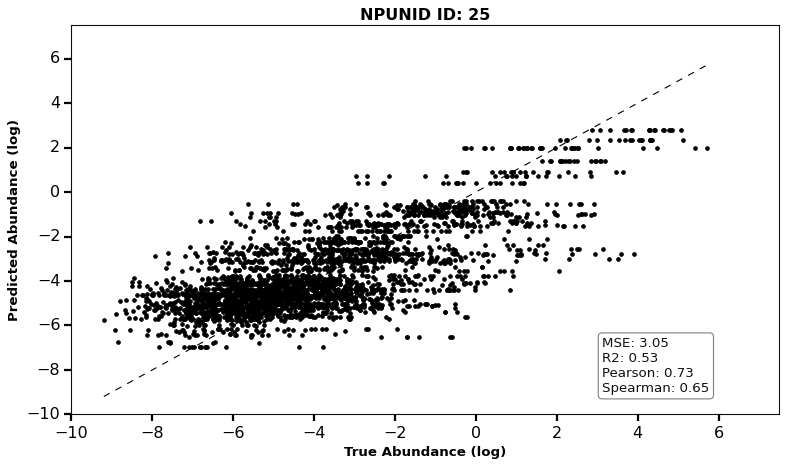

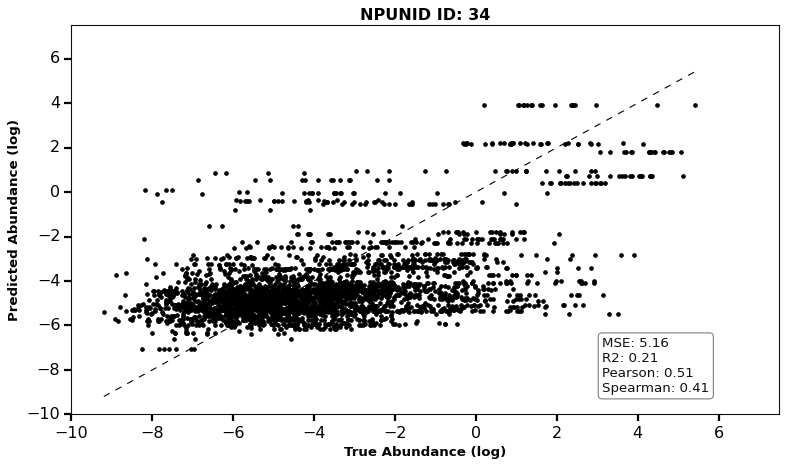

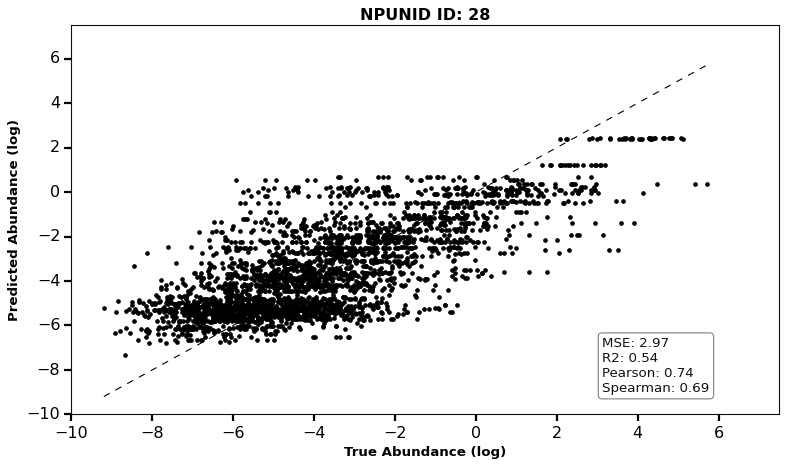

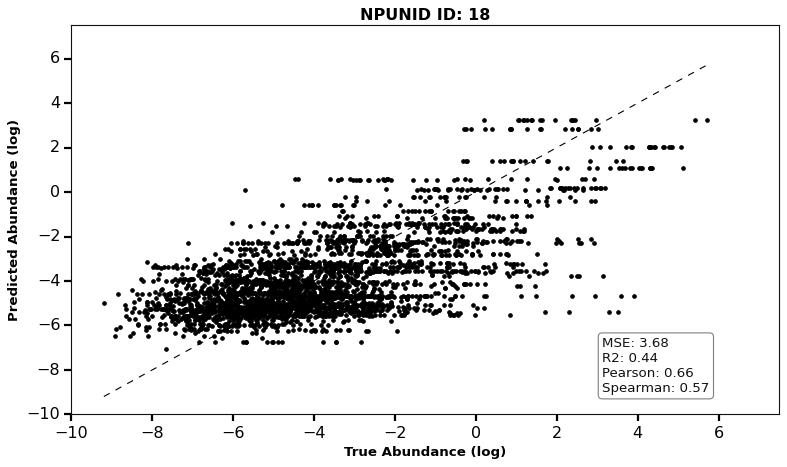

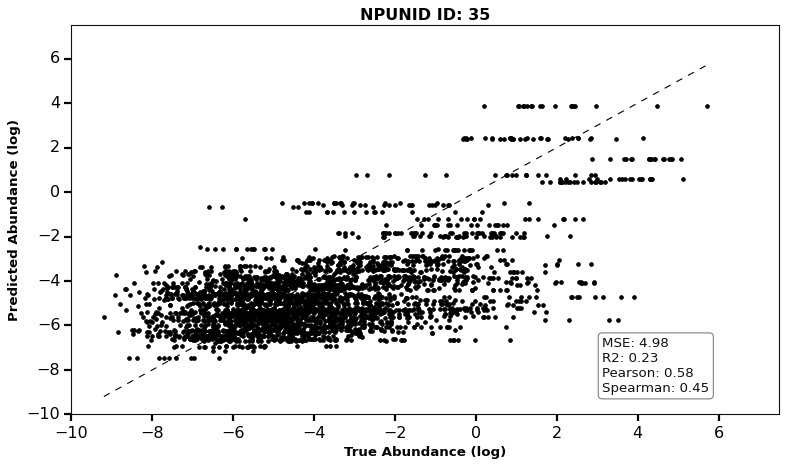

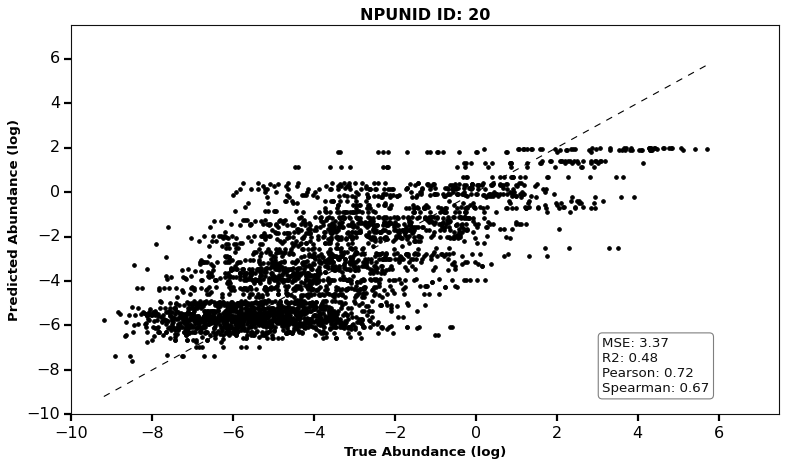

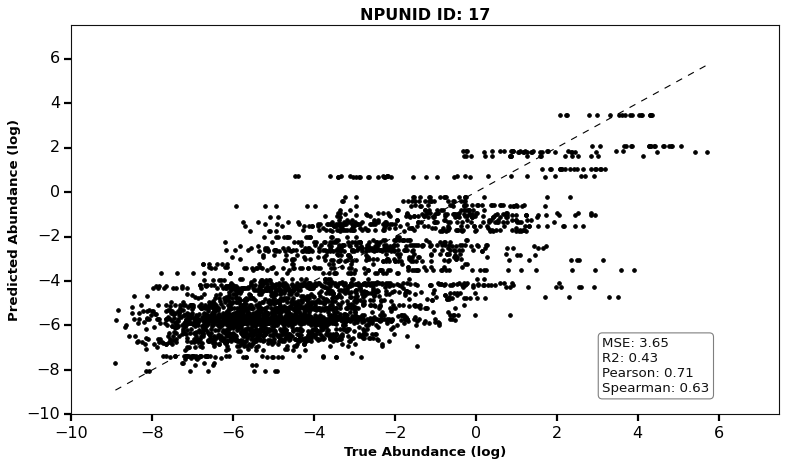

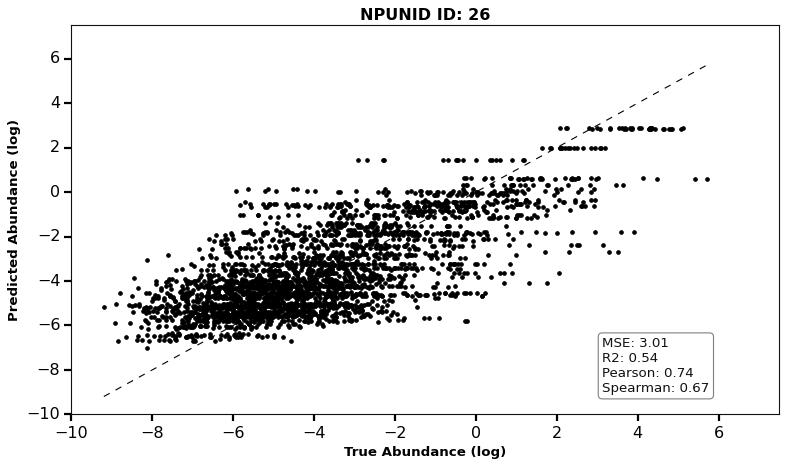

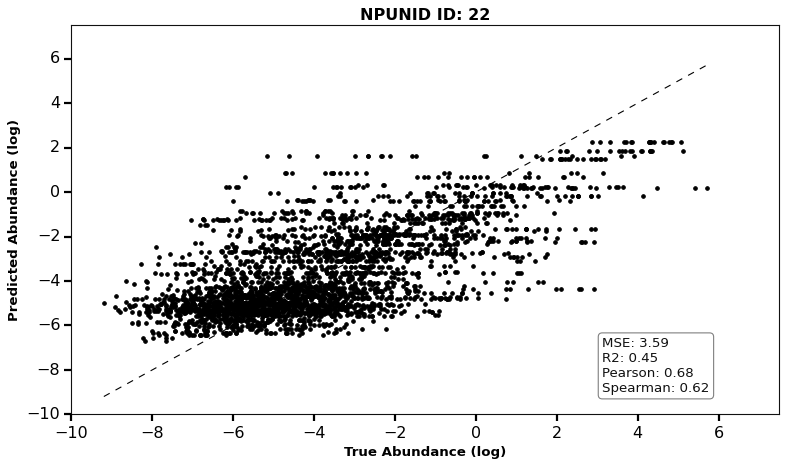

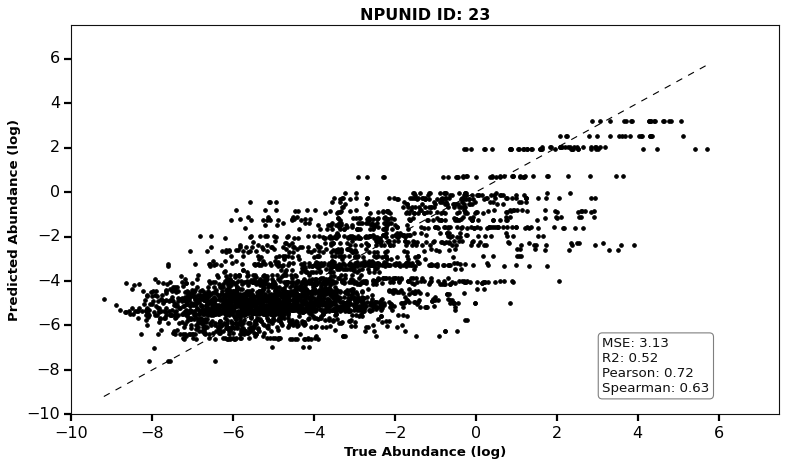

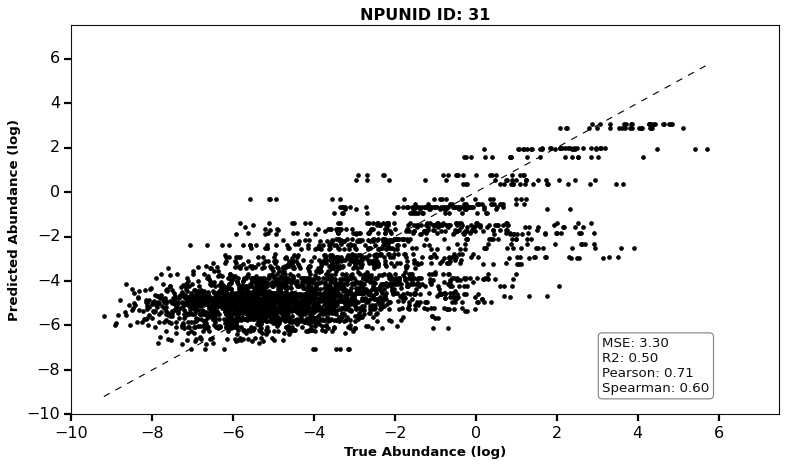

    Pearson  Spearman  R-squared  Mean Squared Error      ID
0  0.713501  0.650141   0.480792            3.385284  ID: 21
0  0.697773  0.639434   0.430193            3.686296  ID: 19
0  0.583573  0.449344   0.311047            4.500041  ID: 32
0  0.644399  0.568068   0.409819            3.839436  ID: 33
0  0.727135  0.660443   0.484441            3.353561  ID: 24


In [ ]:
def predict_nanoparticles(train_set, test_set, name):
  # Initialize a RandomForestRegressor model with 100 estimators
  model = RandomForestRegressor(n_estimators=100)

  # Filter out rows with abundance values below zero for train_set
  Min_Abundance = train_set['Abundance'].drop_duplicates().nsmallest(2).iloc[-1]
  train_set = train_set[train_set['Abundance'] >= Min_Abundance].copy()

  # X is df and y is 'Abundance' column in df
  # 'Abundance' column in df represents a 1D array of target values (class labels)
  label_train = np.log2(train_set['Abundance'].to_numpy().astype(float))

  # Remove unnecessary columns
  columns_to_drop = [col for col in ['Abundance', 'NPUNID', 'Entry'] if col in train_set.columns]
  train_set.drop(columns=columns_to_drop, inplace=True)
  selected_features = train_set.columns.tolist()

  # Filter out rows with abundance values below zero for test_set
  Min_Abundance = test_set['Abundance'].drop_duplicates().nsmallest(2).iloc[-1]
  test_set = test_set[test_set['Abundance'] >= Min_Abundance].copy()

  label_pred = np.log2(test_set['Abundance'].to_numpy().astype(float))

  X_train = train_set[selected_features].copy()
  X_test = test_set[selected_features].copy()
  y_train = label_train
  y_test = label_pred

  # Train the classifier
  model.fit(X_train, y_train)

  # Evaluate on validation set
  y_pred=model.predict(X_test)

  # Calculate evaluation metrics
  pearson, _ = pearsonr(y_test, y_pred)
  spearman, _ = spearmanr(y_test, y_pred)
  r_squared = r2_score(y_test, y_pred)
  mse = mean_squared_error(y_test, y_pred)

  #Create a scatter plot of true vs predicted values
  plt.style.use('classic')

  # Creating the figure and axes object with a specified size and background color
  fig, ax = plt.subplots(figsize=(10, 6), facecolor='white')

  # Set high resolution for clearer output
  plt.rcParams['figure.dpi'] = 300

 # Scatter plot of true vs. predicted values using adjusted color and marker size
  ax.scatter(y_test, y_pred, color='black', s=10)  # Using black for consistency and adjusting marker size

  # Identity line with adjusted color and line style
  ax.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='black')

  # Setting labels, title with customized options
  ax.set_xlabel('True Abundance (log)', fontweight='bold', color='black')
  ax.set_ylabel('Predicted Abundance (log)', fontweight='bold', color='black')
  ax.set_title(f"NPUNID {name}", fontweight='bold', color='black')
  ax.set_xlim(left=-10, right=7.5)
  ax.set_ylim(bottom=-10, top=7.5)

  # Add a metrics box to the plot with consistent styling
  box_text = f"MSE: {mse:.2f}\nR2: {r_squared:.2f}\nPearson: {pearson:.2f}\nSpearman: {spearman:.2f}"
  props = dict(boxstyle='round', facecolor='white', edgecolor='black', alpha=0.5)
  ax.text(0.75, 0.05, box_text, transform=ax.transAxes, fontsize=12, verticalalignment='bottom', bbox=props)

  # Adjusting the tick parameters for consistency
  ax.tick_params(axis='both', which='both', direction='out',
                length=6, width=2, colors='black',
                labelsize='large', labelcolor='black',
                bottom=True, top=False, left=True, right=False)

  # Remove grid lines for a cleaner look
  ax.grid(False)

  # Ensure layout fits the plot and no clipping occurs
  plt.tight_layout()

  # Display the plot
  plt.show()

  # Close the plot explicitly to free up memory
  plt.close()


  results = pd.DataFrame({
        "Pearson": [pearson],
        "Spearman": [spearman],
        "R-squared": [r_squared],
        "Mean Squared Error": [mse],
        "ID": name  # This assumes 'name' is intended to be the identifier for the row
    })

  return results



# Need to figure out a more dynamic way to link dfs of interest
input_strings = ['/content/drive/MyDrive/Predicting_the_Protein_Corona_Vijgen/Output_DataFrames/RFR/Bovine Swiss Top3/df_RFECV_RFR_df_Bov Swiss Top3.xlsx']

for input_string in input_strings:
  df = pd.read_excel(input_string, header=0)

  # Create new evaluation df that will have the results of everything(?) appended to it
  full_eval = pd.DataFrame()

  # Create a list of all unique NPUNID IDs in current df
  np_ids = df['NPUNID'].unique().tolist()
  print(np_ids)

  for np_id in np_ids:
    # Filter df to only include rows with current NPUNID - test set
    current_np = df.loc[df['NPUNID'] == np_id].copy()
    # Filter df to only include rows without current NPUNID - train set
    temp_df = df.loc[df['NPUNID'] != np_id].copy()

    # Train RFR model to make predictions on current NPUNID entry
    eval = predict_nanoparticles(current_np, temp_df, 'ID: '+ str(np_id))

    # Add a column indicating which NP ID this test is associated with
    #eval['ID'] = np_id
    # Append the test to the full evaluation df
    full_eval = pd.concat([full_eval, eval])

  print(full_eval.head())





Semi-old code
---

Visualization of Individual Feature Relationships

In [ ]:
for file in processed_files:
    print(file)
    for i, feature in enumerate(selected_features):
        feature_index = df.columns.get_loc(feature)
        fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 12))

        file_name = file

        # Split the file path using the '/' delimiter
        file_parts = file_name.split('/')

        # Extract the last part of the file path, which contains the file name
        file_name_part = file_parts[-1]

        # Split the file name using '_' as the delimiter
        file_name_parts = file_name_part.split('_')

        # Extract the relevant part of the file name
        desired_name = ' '.join(file_name_parts[1:-1])


        # Plot y_pred vs y_test
        ax = axes[0]
        ax.scatter(y_test, y_pred, color='salmon')
        ax.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='gray')  # Identity line
        ax.set_xlabel('True Abundance (log)')
        ax.set_ylabel('Predicted Abundance (log)')
        ax.set_title(f'{desired_name}: {feature}')

        #Plot X_test vs y_test
        ax = axes[1]
        ax.scatter(X_test.iloc[:, feature_index], y_test, color='dodgerblue', label='Feature Values')
        ax.set_xlabel(f'{feature} Values')
        ax.set_ylabel('True Protein Abundance')
        ax.set_title(f'{desired_name}: {feature}')
        ax.legend()

        plt.tight_layout()
        plt.show()

Output hidden; open in https://colab.research.google.com to view.

Code Testing Space


trying to make code parallel to KP's version

In [ ]:
# Specify input directory filepath
input_directory = '/content/drive/MyDrive/Predicting_the_Protein_Corona_Vijgen/Input_DataFrames/post_clean_up_dfs'

# Initialize an empty list to store Excel file paths
processed_files = []

# Iterate over the files in the directory
for file in os.listdir(input_directory):
    # Check if the file is an Excel file
    if file.endswith('.xlsx'):
        # Get the full path of the Excel file
        file_path = os.path.join(input_directory, file)
        # Append the file path to the list
        processed_files.append(file_path)

# Print the list of Excel file paths to verify proper list appending
print(processed_files)

['/content/drive/MyDrive/Predicting_the_Protein_Corona_Vijgen/Input_DataFrames/post_clean_up_dfs/df_NormBov_Swiss_Intensity_modified.xlsx', '/content/drive/MyDrive/Predicting_the_Protein_Corona_Vijgen/Input_DataFrames/post_clean_up_dfs/df_NormBov_All_Intensity_modified.xlsx']


Feature Analysis

RFECV and Visulization

In [ ]:
selected_features_dict = {}

for file in processed_files:
    print(file)
    df = pd.read_excel(file, header=0)
    df_original = df.copy()

    model = RandomForestRegressor(n_estimators=100)

    # RFE/RFECV Variables
    step = 1
    min_feats = 1
    identifier = 'neg_mean_squared_error' # do I need this?
    fold_num = 10
    keep_columns = ['Abundance', 'NPUNID', 'Entry']

    # 'Abundance' column in df represents a 1D array of target values (class labels)
    y_label = np.log2(df['Abundance'].values.astype(float))

    # Remove columns in df that should not be considered as potential features in RFE & RFECV
    columns_to_drop = [col for col in ['Abundance', 'NPUNID', 'NPID', 'Entry', 'Sequence', 'Sample_num', 'Raw_FileID',
                                       'Ligands', 'BatchID', 'Protein Source'] if col in df.columns]
    df.drop(columns=columns_to_drop, inplace=True)

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(df, y_label, test_size=0.1, random_state=42)

    # Perform feature selection using RFE
    rfe = RFE(model, n_features_to_select=16, step=step)
    rfe = rfe.fit(X_train, y_train) # can you perform feature selection on the training set of the data? Yes this best practice to reduce overfitting the model.
    selected_features = X_train.columns[rfe.support_].tolist()
    selected_features_dict[file] = selected_features  # Store selected features for this file in the dictionary
    feature_importances = rfe.estimator_.feature_importances_
    normalized_importances = 100.0 * (feature_importances / feature_importances.sum())
    feature_importance_df = pd.DataFrame({'Feature': selected_features, 'Importance': normalized_importances})
    print(feature_importance_df)

    # Train model with selected features
    model.fit(X_train[selected_features], y_train)

    # Predict on testing set
    y_pred = model.predict(X_test[selected_features])

    # Calculate evaluation metrics
    r_squared = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    # Print evaluation metrics
    print("R-squared:", r_squared)
    print("Mean Squared Error:", mse)

    # Store selected features and evaluation metrics in dictionary
    selected_features_dict[file] = {'selected_features': selected_features,
                                    'r_squared': r_squared,
                                    'mean_squared_error': mse}
    print("Selected Features Dictionary:")
    pprint.pprint(selected_features_dict)



/content/drive/MyDrive/Predicting_the_Protein_Corona_Vijgen/Input_DataFrames/post_clean_up_dfs/df_NormBov Swiss Intensity_modified.xlsx
                                Feature  Importance
0                    Abundance_Controls   49.448407
1                             frac_aa_A    2.497720
2                             frac_aa_F    4.048172
3                             frac_aa_K    2.736100
4                             frac_aa_N    2.647112
5                               rsa_std    2.906103
6                               asa_sum    3.074186
7            fraction_exposed_exposed_E    2.816143
8            fraction_exposed_exposed_F    2.624817
9            fraction_exposed_exposed_H    2.569414
10           fraction_exposed_exposed_R    2.558911
11        nsp_secondary_structure_sheet    3.046717
12        nsp_secondary_structure_helix    3.879049
13                       Zeta Potential    6.889579
14                    Dh_functionalized    5.240274
15  NP_incubation Concentration 

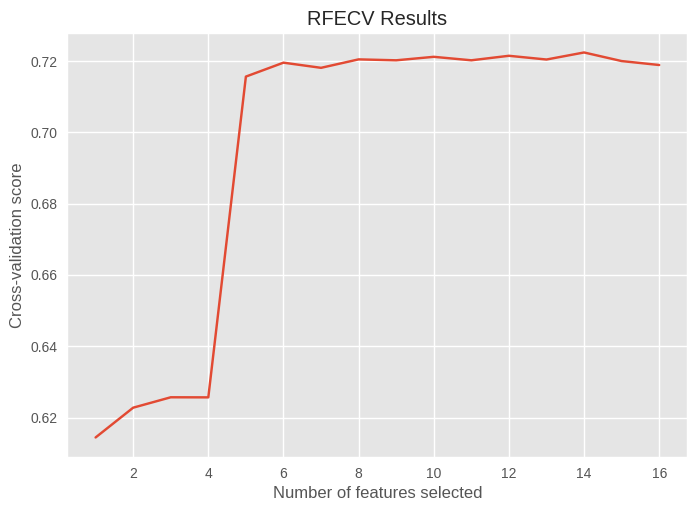

Optimal number of features: 14
Selected features after RFECV: ['Abundance_Controls', 'frac_aa_A', 'frac_aa_C', 'frac_aa_E', 'molecular_weight', 'aromaticity', 'isoelectric_point', 'secondary_structure_fraction_disordered', 'asa_sum', 'fraction_exposed_exposed_K', 'fraction_exposed_exposed_T', 'nsp_secondary_structure_coil', 'Zeta Potential', 'Dh_functionalized']


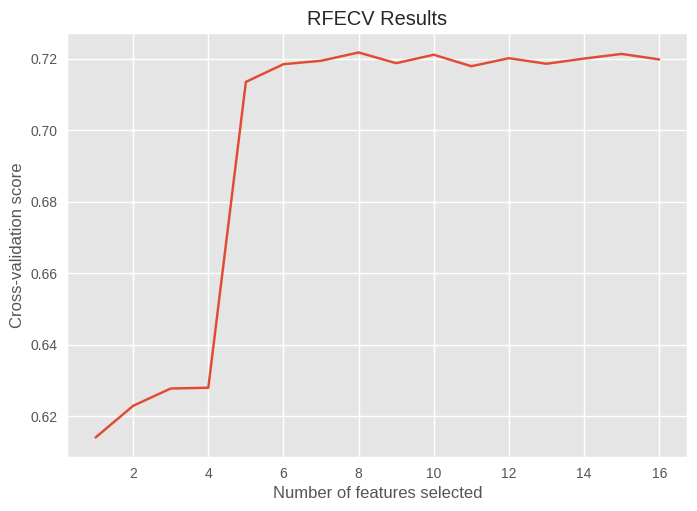

Optimal number of features: 8
Selected features after RFECV: ['Abundance_Controls', 'frac_aa_C', 'molecular_weight', 'aromaticity', 'isoelectric_point', 'asa_sum', 'nsp_secondary_structure_coil', 'Zeta Potential']


In [ ]:
for file in processed_files:
    df = pd.read_excel(file, header=0)
    df_original = df.copy()

    # Perform RFECV after RFE
    rfecv = RFECV(estimator=model, cv=5)
    rfecv.fit(X_train[selected_features], y_train)

    # Plot number of features vs. cross-validation scores
    plt.figure()
    plt.xlabel("Number of features selected")
    plt.ylabel("Cross-validation score")
    plt.title("RFECV Results")
    plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
    plt.show()

    # Print the optimal number of features
    print("Optimal number of features: %d" % rfecv.n_features_)

    # Assess feature importance
    selected_features_rfecv = [selected_features[i] for i in range(len(selected_features)) if rfecv.support_[i]]
    print("Selected features after RFECV:", selected_features_rfecv)

In [ ]:
for file in processed_files:
  print(file)

/content/drive/MyDrive/Predicting_the_Protein_Corona_Vijgen/Input_DataFrames/post_clean_up_dfs/df_NormBov Swiss Intensity_modified.xlsx
/content/drive/MyDrive/Predicting_the_Protein_Corona_Vijgen/Input_DataFrames/post_clean_up_dfs/df_NormBov All Intensity_modified.xlsx


Grouped Analysis


Creating DataFrames Grouped by 'Entry' Column; Grouping Based Off of Matching Protein IDs

In [ ]:
# might need to have a bit of 'hard coding'; specifically, need to enter in the file you are searching through.

# assign file path directory to 'file' variable; do for each file wanting processing
file = '/content/drive/MyDrive/Predicting_the_Protein_Corona_Vijgen/Input_DataFrames/post_clean_up_dfs/df_NormBov Swiss Intensity_modified.xlsx'

df = pd.read_excel(file, header=0)
grouped_dfs = []

selected_features = selected_features_dict[file]['selected_features']  # Access selected features for this file
for entry, group_df in df.groupby('Entry'):
  mean_abundance = group_df['Abundance'].mean()
  group_df['Mean_Abundance'] = mean_abundance.round(2)
  grouped_dfs.append(group_df)

  # Calculate abundance deviation for each entry in the group
  group_df['Abundance_Deviation'] = (group_df['Abundance'] - mean_abundance).round(2)
  group_df['Abundance'] = group_df['Abundance'].round(2)

for group_df in grouped_dfs:
    group_df['Mean_Abundance'] = pd.to_numeric(group_df['Mean_Abundance'], errors='coerce')

sorted_grouped_dfs = sorted(grouped_dfs, key=lambda x: x['Mean_Abundance'].max(), reverse=True)

top_grouped_dfs = sorted_grouped_dfs[:10]

for group_df in top_grouped_dfs:
    print(group_df[['NPUNID','Entry','Abundance','Mean_Abundance', 'Abundance_Deviation']])


# for feature in selected_features:  # Use selected features for visualization
#   plt.figure(figsize=(8, 6))
#   for group_df in top_grouped_dfs:
#       sns.scatterplot(data=group_df, x=feature, y='Mean_Abundance', label=group_df['Entry'].iloc[0])
#   plt.title(f'Top 10 Proteins: Mean Abundance v {feature}')
#   plt.xlabel(feature)
#   plt.ylabel('Mean Abundance')
#   plt.legend(title='Entry', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1)
#   plt.tight_layout()
#   plt.show()


      NPUNID   Entry  Abundance  Mean_Abundance  Abundance_Deviation
188       29  P02769      42.79           29.67                13.13
239       34  P02769      16.64           29.67               -13.02
379       30  P02769      38.01           29.67                 8.34
432       32  P02769      36.70           29.67                 7.03
462       24  P02769      28.88           29.67                -0.78
497       27  P02769      43.72           29.67                14.05
827       18  P02769      19.96           29.67                -9.71
1080      31  P02769      46.82           29.67                17.16
1191      20  P02769      20.65           29.67                -9.01
1440      21  P02769      29.87           29.67                 0.20
1529      22  P02769      32.89           29.67                 3.22
1551      28  P02769      27.41           29.67                -2.26
1566      35  P02769      14.02           29.67               -15.65
1630      33  P02769      22.52   

In [ ]:
# plotting the deviations from the mean abundance (enrichment and depletion values)



In [ ]:
# print("Mean Abundance values for the top 15 entries:")
# for i, group_df in enumerate(top_grouped_dfs, 1):
#     mean_abundance = group_df['Mean_Abundance'].iloc[0]
#     print(f"Entry {i}: {mean_abundance}")

print("Mean Abundance values for the top 10 entries:")
for i, group_df in enumerate(top_grouped_dfs, 1):
    entry_value = group_df['Entry'].iloc[0]  # Get the 'Entry' value
    mean_abundance = group_df['Mean_Abundance'].iloc[0]  # Get the mean abundance value
    print(f"Entry {i}: {entry_value} - Mean Abundance: {mean_abundance}")


Mean Abundance values for the top 10 entries:
Entry 1: P02769 - Mean Abundance: 29.67
Entry 2: P12763 - Mean Abundance: 10.38
Entry 3: P01966 - Mean Abundance: 6.89
Entry 4: P34955 - Mean Abundance: 4.05
Entry 5: P15497 - Mean Abundance: 3.51
Entry 6: Q2UVX4 - Mean Abundance: 3.29
Entry 7: P00735 - Mean Abundance: 2.77
Entry 8: Q03247 - Mean Abundance: 2.61
Entry 9: P02081 - Mean Abundance: 2.43
Entry 10: Q7SIH1 - Mean Abundance: 2.43


In [ ]:
# For shorter computing time, run one file at a time
input_directory = '/content/drive/MyDrive/Predicting_the_Protein_Corona_Vijgen/Input_DataFrames/post_clean_up_dfs/'


file_beginning = 'df_'
file_group = 'Bov Swiss' # options are 'Bov Swiss', 'Bov Swiss + TrEMBLE'
file_ending = ' Top3.xlsx' # options are ' Intensity.xlsx', ' Top3.xlsx', ' iBAQ.xlsx'
files = []

for file in os.listdir(input_directory):
    if file_group in file and file_ending in file:
        files.append(file)

print(files)


['df_Bov Swiss Top3.xlsx', 'df_Bov Swiss + TrEMBLE Top3.xlsx']


In [ ]:
def hyperparameter_tuning(X_train, y_train):
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_features': ['auto', 'sqrt', 'log2'],
        'max_depth': [10, 20, 30, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    rf = RandomForestRegressor()
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
    grid_search.fit(X_train, y_train)
    return grid_search.best_params_

def predict_nanoparticles(train_set, test_set, name, selected_features):
    # Initialize a RandomForestRegressor model with 100 estimators
    model = RandomForestRegressor(n_estimators=100)

    # Filter out rows with abundance values below zero for train_set
    Min_Abundance = train_set['Abundance'].drop_duplicates().nsmallest(2).iloc[-1]
    train_set = train_set[train_set['Abundance'] >= Min_Abundance].copy()

    # X is df and y is 'Abundance' column in df
    # 'Abundance' column in df represents a 1D array of target values (class labels)
    label_train = np.log2(train_set['Abundance'].to_numpy().astype(float))

    # Remove unnecessary columns
    columns_to_drop = [col for col in ['Abundance', 'NPUNID', 'Entry'] if col in train_set.columns]
    train_set.drop(columns=columns_to_drop, inplace=True)

    # Filter out rows with abundance values below zero for test_set
    Min_Abundance = test_set['Abundance'].drop_duplicates().nsmallest(2).iloc[-1]
    test_set = test_set[test_set['Abundance'] >= Min_Abundance].copy()

    label_pred = np.log2(test_set['Abundance'].to_numpy().astype(float))

    # Use selected features for training and testing
    X_train = train_set[selected_features].copy()
    X_test = test_set[selected_features].copy()
    y_train = label_train
    y_test = label_pred

    # Hyperparameter tuning
    best_params = hyperparameter_tuning(X_train, y_train)
    print(f"Best parameters for {name}: {best_params}")

    # Train the model with the best parameters
    model = RandomForestRegressor(**best_params)
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    pearson, _ = pearsonr(y_test, y_pred)
    spearman, _ = spearmanr(y_test, y_pred)
    r_squared = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    # Create a scatter plot of true vs predicted values
    fig, ax = plt.subplots()
    plt.style.use('ggplot')
    plt.rcParams['figure.dpi'] = 300
    ax.scatter(y_test, y_pred, color='salmon')
    ax.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='gray')  # Identity line
    ax.set_xlabel('True Abundance (log)')
    ax.set_ylabel('Predicted Abundance (log)')
    ax.set_title(f"NPUNID {name}")

    # Add a metrics box to the plot
    box_text = f"MSE: {mse:.2f}\nR2: {r_squared:.2f}\nPearson: {pearson:.2f}\nSpearman: {spearman:.2f}"
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    ax.text(0.75, 0.05, box_text, transform=ax.transAxes, fontsize=14, verticalalignment='bottom', bbox=props)

    plt.tight_layout()
    plt.show()

    results = pd.DataFrame({
        "Pearson": [pearson],
        "Spearman": [spearman],
        "R-squared": [r_squared],
        "Mean Squared Error": [mse],
        "ID": name
    })
    return results

# Example usage
input_strings = ['/content/drive/MyDrive/Predicting_the_Protein_Corona_Vijgen/Output_DataFrames/RFR/df_RFECV_RFR_df_Bov Swiss Intensity.xlsx']

for input_string in input_strings:
    df = pd.read_excel(input_string, header=0)

    # Assuming 'selected_features' contains the features selected by RFECV
    selected_features = [col for col in df.columns if col not in ['Abundance', 'NPUNID', 'Entry']]

    # Create new evaluation df that will have the results of everything(?) appended to it
    full_eval = pd.DataFrame()

    # Create a list of all unique NPUNID IDs in current df
    np_ids = df['NPUNID'].unique().tolist()
    print(np_ids)

    for np_id in np_ids:
        # Filter df to only include rows with current NPUNID - test set
        current_np = df.loc[df['NPUNID'] == np_id].copy()
        # Filter df to only include rows without current NPUNID - train set
        temp_df = df.loc[df['NPUNID'] != np_id].copy()

        # Train RFR model to make predictions on current NPUNID entry
        eval = predict_nanoparticles(current_np, temp_df, 'ID: '+ str(np_id), selected_features)

        # Append the test to the full evaluation df
        full_eval = pd.concat([full_eval, eval], ignore_index=True)

    # Set display options to show all rows
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', None)
    pd.set_option('display.max_colwidth', None)

    print(full_eval)


Output hidden; open in https://colab.research.google.com to view.

# OLD CODE

MSE values for /content/drive/MyDrive/Predicting_the_Protein_Corona_Vijgen/Input_DataFrames/post_clean_up_dfs/df_NormBov Swiss Intensity_modified.xlsx: [2.8263316352438306]


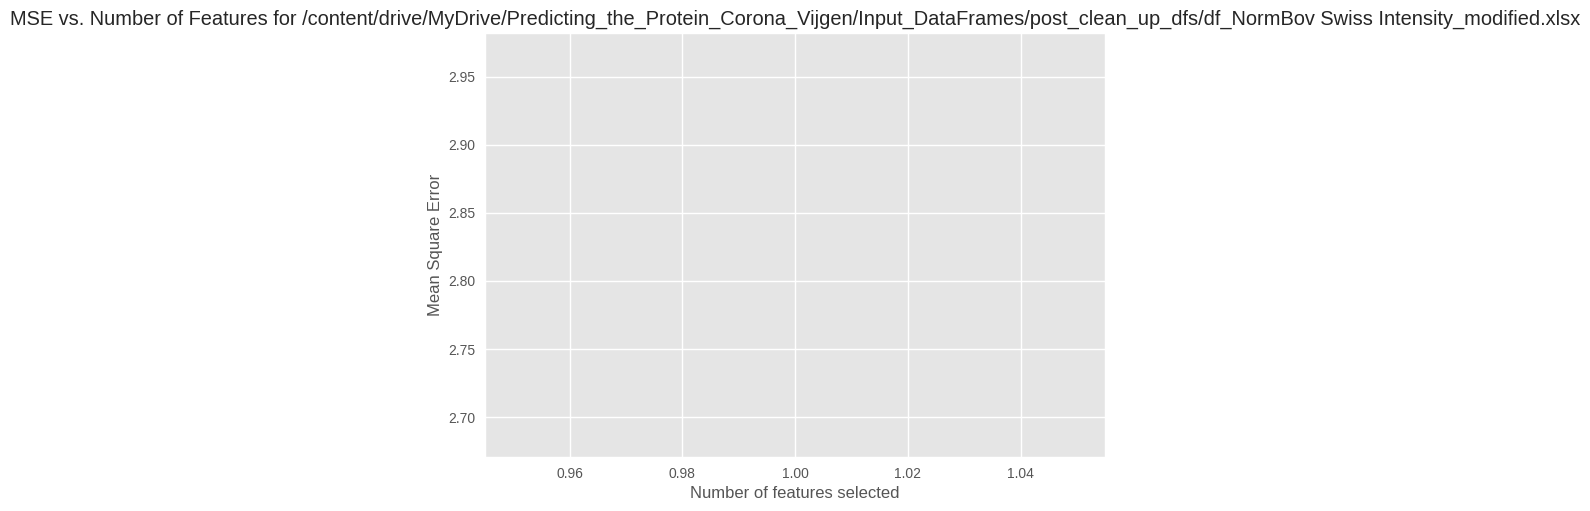

MSE values for /content/drive/MyDrive/Predicting_the_Protein_Corona_Vijgen/Input_DataFrames/post_clean_up_dfs/df_NormBov All Intensity_modified.xlsx: [2.8263316352438306, 2.833770940254727]


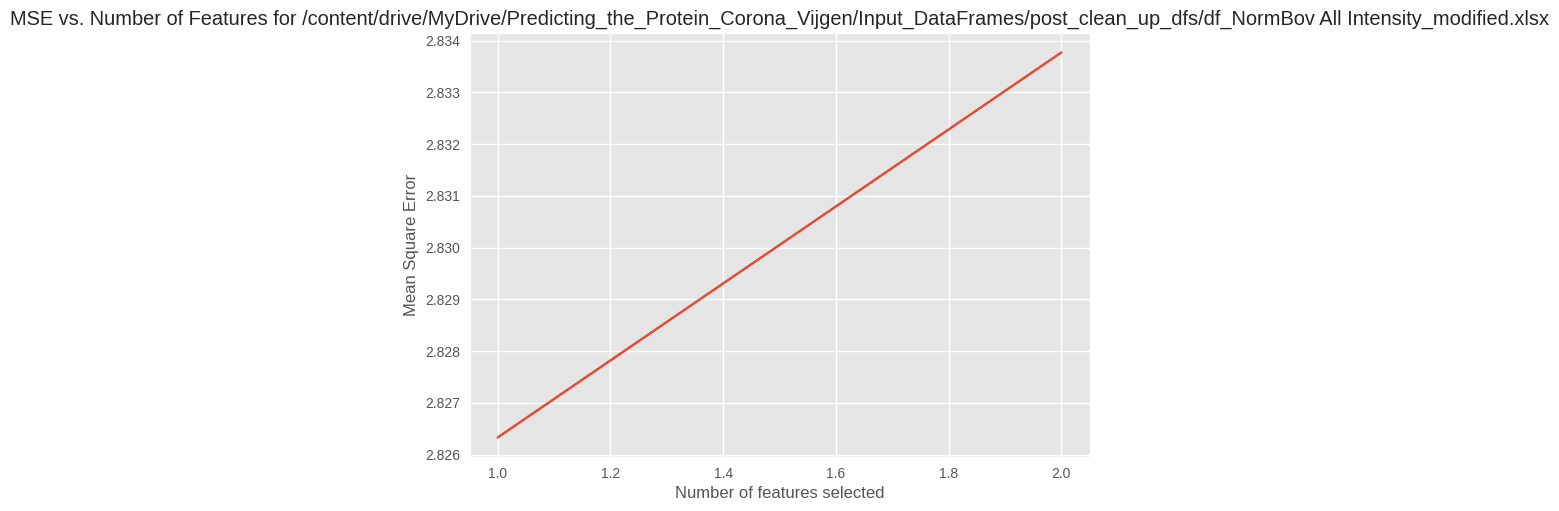

Total number of MSE values: 2


In [ ]:
mse_scores = []  # Initialize mse_scores outside the loop

for file in processed_files:
    df = pd.read_excel(file, header=0)
    df_original = df.copy()

    # Perform RFECV after RFE
    rfecv = RFECV(estimator=model, cv=5)
    rfecv.fit(X_train[selected_features], y_train)

    # Assess feature importance
    selected_features_rfecv = [selected_features[i] for i in range(len(selected_features)) if rfecv.support_[i]]

    # Evaluate model performance with selected features
    X_train_rfecv = X_train[selected_features_rfecv]
    X_test_rfecv = X_test[selected_features_rfecv]
    model.fit(X_train_rfecv, y_train)
    y_pred = model.predict(X_test_rfecv)

    # Calculate mean square error
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

    # Print MSE values for debug
    print(f"MSE values for {file}: {mse_scores}")

    # Plot MSE vs. number of features for the current file
    plt.figure()
    plt.xlabel("Number of features selected")
    plt.ylabel("Mean Square Error")
    plt.title(f"MSE vs. Number of Features for {file}")
    plt.plot(range(1, len(mse_scores) + 1), mse_scores)
    plt.show()

# Print total number of MSE values for debug
print(f"Total number of MSE values: {len(mse_scores)}")



In [ ]:
# Initialize an empty list to store the results
results = []

# Iterate through each file in grouped_dfs_dict
for file, unique_grouped_dfs in grouped_dfs_dict.items():
    print(f"File: {file}")
    print(f"Number of Unique Entries: {len(unique_grouped_dfs)}")

    # Convert 'Mean_Abundance' column to numeric data type and handle errors
    for entry, group_df in unique_grouped_dfs.items():
        group_df['Mean_Abundance'] = pd.to_numeric(group_df['Mean_Abundance'], errors='coerce')

    # Sort the DataFrames based on 'Mean_Abundance' column in descending order
    sorted_dfs = sorted(unique_grouped_dfs.values(), key=lambda x: x['Mean_Abundance'].iloc[0], reverse=True)

    # Populate the results list with dictionaries containing file name, entry, number of instances, and mean abundance
    for group_df in sorted_dfs:
        entry = group_df['Entry'].iloc[0]  # Get the entry from the first row of the DataFrame
        num_instances = len(group_df)
        mean_abundance = group_df['Mean_Abundance'].iloc[0]
        results.append({'File': file, 'Entry': entry, 'Number of Instances': num_instances, 'Mean_Abundance': mean_abundance})

# Convert the results list to a DataFrame
result_df = pd.DataFrame(results)

# Print the result DataFrame
print(result_df)


In [ ]:
top_25 = result_df.groupby('Entry').head(25)

# Iterate through selected features and plot against mean abundance
for feature in selected_features:
    plt.figure(figsize=(8, 6))
    for entry, group_df in top_25.groupby('Entry'):
        sns.scatterplot(data=group_df, x=feature, y='Mean_Abundance', label=entry)
    plt.title(f'{feature} vs. Mean Abundance (Top 25)')
    plt.xlabel(feature)
    plt.ylabel('Mean Abundance')
    plt.legend(title='Entry', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=8)
    plt.tight_layout()
    plt.show()

In [ ]:
grouped_dfs_dict = {}  # Initialize dictionary for grouped DataFrames

# Iterate through each file in processed_files
for file in processed_files:
    df = pd.read_excel(file, header=0)  # Read the Excel file

    # Access selected features for this file
    selected_features = selected_features_dict[file]['selected_features']

    # Initialize dictionary to store unique grouped DataFrames for this file
    unique_grouped_dfs = {}

    # Group by 'Entry' and calculate mean abundance for each group
    for entry, group_df in df.groupby('Entry'):
        mean_abundance = group_df['Abundance'].mean()
        group_df['Mean_Abundance'] = mean_abundance
        unique_grouped_dfs[entry] = group_df

    # Add the dictionary of unique grouped DataFrames to the main dictionary with the file name as key
    grouped_dfs_dict[file] = unique_grouped_dfs

for file, unique_grouped_dfs in grouped_dfs_dict.items():
    print(f"File: {file}")
    print(f"Number of Unique Entries: {len(unique_grouped_dfs)}")
    for group_df in unique_grouped_dfs.values():  # Iterate over DataFrames directly
        print(f"Number of Instances: {len(group_df)}")
        print(group_df)  # Print the DataFrame containing instances of this entry
        print()  # Print an empty line for better readability


In [ ]:
# IGNORE!

grouped_dfs_dict = {}  # Initialize dictionary for grouped DataFrames

# Iterate through each file in processed_files
for file in processed_files:
    df = pd.read_excel(file, header=0)  # Read the Excel file

    # Initialize list for unique grouped DataFrames for this file
    unique_grouped_dfs = []

    # Access selected features for this file
    selected_features = selected_features_dict[file]['selected_features']

    # Group by 'Entry' and calculate mean abundance for each group
    for entry, group_df in df.groupby('Entry'):
        mean_abundance = group_df['Abundance'].mean()
        group_df['Mean_Abundance'] = mean_abundance
        unique_grouped_dfs.append(group_df)

    # Add the list of unique grouped DataFrames to the dictionary with the file name as key
    grouped_dfs_dict[file] = unique_grouped_dfs

# Accessing the dictionary later:
for file, unique_grouped_dfs in grouped_dfs_dict.items():
    print(f"File: {file}")
    print(f"Number of Unique Entries: {len(unique_grouped_dfs)}")
    for group_df in unique_grouped_dfs:
        entry = group_df['Entry'].iloc[0]  # Get the entry from the first row of the DataFrame
        print(f"Unique Entry: {entry}")
        print(f"Number of Instances: {len(group_df)}")
        print(group_df)  # Print the DataFrame containing instances of this entry
        print()  # Print an empty line for better readability


# IGNORE!

In [ ]:
# possible ignore
grouped_dfs = []
for file in processed_files:
    df = pd.read_excel(file, header=0)
    selected_features = selected_features_dict[file]['selected_features']  # Access selected features for this file
    for entry, group_df in df.groupby('Entry'):
        mean_abundance = group_df['Abundance'].mean()
        group_df['Mean_Abundance'] = mean_abundance
        grouped_dfs.append(group_df)

unique_entry_count = 0  # Initialize count for unique entries

for group_df in grouped_dfs:
    unique_entry_count += 1  # Increment count for each unique entry
    entry = group_df['Entry'].iloc[0]  # Get the entry from the first row of the DataFrame
    print(f"Unique Entry: {entry}")
    print(f"Number of Instances: {len(group_df)}")
    print(group_df)  # Print the DataFrame containing instances of this entry
    print()  # Print an empty line for better readability

print(f"Total Unique Entries: {unique_entry_count}")



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

selected_features_dict = {}

# Loop over processed files
for file in processed_files:
    df = pd.read_excel(file, header=0)
    df_original = df.copy()

    model = RandomForestRegressor(n_estimators=100)

    # RFE/RFECV Variables
    step = 1
    min_feats = 1
    identifier = 'neg_mean_squared_error'
    fold_num = 10
    keep_columns = ['Abundance', 'NPUNID', 'Entry']

    # 'Abundance' column in df represents a 1D array of target values (class labels)
    y_label = np.log2(df['Abundance'].values.astype(float))

    # Remove columns in df that should not be considered as potential features in RFE & RFECV
    columns_to_drop = [col for col in ['Abundance', 'NPUNID', 'NPID', 'Entry', 'Sequence', 'Sample_num', 'Raw_FileID',
                                       'Ligands', 'BatchID', 'Protein Source'] if col in df.columns]
    df.drop(columns=columns_to_drop, inplace=True)

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(df, y_label, test_size=0.1, random_state=42)

    # Perform feature selection using RFE
    rfe = RFE(model, n_features_to_select=10, step=step)
    rfe = rfe.fit(X_train, y_train) # can you perform feature selection on the training set of the data? Yes this best practice to reduce overfitting the model.
    selected_features = X_train.columns[rfe.support_].tolist()
    selected_features_dict[file] = selected_features  # Store selected features for this file in the dictionary
    feature_importances = rfe.estimator_.feature_importances_
    normalized_importances = 100.0 * (feature_importances / feature_importances.sum())
    feature_importance_df = pd.DataFrame({'Feature': selected_features, 'Importance': normalized_importances})
    print(feature_importance_df)

    # Train model with selected features
    model.fit(X_train[selected_features], y_train)

    # Predict on testing set
    y_pred = model.predict(X_test[selected_features])

    # Calculate evaluation metrics
    r_squared = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    # Print evaluation metrics
    print("R-squared:", r_squared)
    print("Mean Squared Error:", mse)

    # Store selected features and evaluation metrics in dictionary
    selected_features_dict[file] = {'selected_features': selected_features,
                                    'r_squared': r_squared,
                                    'mean_squared_error': mse}

    # Create subplots for each selected feature
    num_features = len(selected_features)
    fig, axes = plt.subplots(nrows=num_features, ncols=1, figsize=(8, 6*num_features))

    # Plotting for each feature
    for i, feature in enumerate(selected_features):
        feature_index = df.columns.get_loc(feature)
        ax = axes[i]
        ax.scatter(X_test.iloc[:, feature_index], y_test, color='dodgerblue', label='Feature Values')
        ax.scatter(y_test, y_pred, color='salmon')
        ax.set_xlabel('True Values')
        ax.set_ylabel('Predictions')
        ax.set_title(f'True vs Predicted Protein Abundance for {feature}')
        ax.legend()

    plt.tight_layout()
    plt.show()


# After the loop, selected_features_dict will contain the selected features and evaluation metrics for each file
for file, data in selected_features_dict.items():
    print("File:", file)
    print("Selected Features:", data['selected_features'])
    print("R-squared:", data['r_squared'])
    print("Mean Squared Error:", data['mean_squared_error'])
    print()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.feature_selection import RFECV

selected_features_dict = {}

for file in processed_files:
    print(file)
    df = pd.read_excel(file, header=0)
    df_original = df.copy()

    model = RandomForestRegressor(n_estimators=100)

    # RFE/RFECV Variables
    step = 1
    min_feats = 1
    identifier = 'neg_mean_squared_error'
    fold_num = 10
    keep_columns = ['Abundance', 'NPUNID', 'Entry']

    # 'Abundance' column in df represents a 1D array of target values (class labels)
    y_label = np.log2(df['Abundance'].values.astype(float))

    # Remove columns in df that should not be considered as potential features in RFE & RFECV
    columns_to_drop = [col for col in ['Abundance', 'NPUNID', 'NPID', 'Entry', 'Sequence', 'Sample_num', 'Raw_FileID',
                                       'Ligands', 'BatchID', 'Protein Source'] if col in df.columns]
    df.drop(columns=columns_to_drop, inplace=True)

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(df, y_label, test_size=0.1, random_state=42)

    # Perform feature selection using RFE
    rfe = RFE(model, n_features_to_select=16, step=step)
    rfe = rfe.fit(X_train, y_train) # can you perform feature selection on the training set of the data? Yes this best practice to reduce overfitting the model.
    selected_features = X_train.columns[rfe.support_].tolist()
    selected_features_dict[file] = selected_features  # Store selected features for this file in the dictionary
    feature_importances = rfe.estimator_.feature_importances_
    normalized_importances = 100.0 * (feature_importances / feature_importances.sum())
    feature_importance_df = pd.DataFrame({'Feature': selected_features, 'Importance': normalized_importances})
    print(feature_importance_df)

    # Train model with selected features
    model.fit(X_train[selected_features], y_train)

    # Predict on testing set
    y_pred = model.predict(X_test[selected_features])

    # Calculate evaluation metrics
    r_squared = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    # Print evaluation metrics
    print("R-squared:", r_squared)
    print("Mean Squared Error:", mse)

    # Store selected features and evaluation metrics in dictionary
    selected_features_dict[file] = {'selected_features': selected_features,
                                    'r_squared': r_squared,
                                    'mean_squared_error': mse}

    # Create subplots for each selected feature
    for i, feature in enumerate(selected_features):
      feature_index = df.columns.get_loc(feature)
      fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 12))

      # Plot y_pred vs y_test
      ax = axes[0]
      ax.scatter(y_test, y_pred, color='salmon')
      ax.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='gray')  # Identity line
      ax.set_xlabel('True Values') # log based?
      ax.set_ylabel('Predictions')
      ax.set_title(f'True vs Predicted Protein Abundance for {feature}')

      # Plot X_test vs y_test
      ax = axes[1]
      ax.scatter(X_test.iloc[:, feature_index], y_test, color='dodgerblue', label='Feature Values')
      ax.set_xlabel(f'{feature} Values')
      ax.set_ylabel('True Protein Abundance')
      ax.set_title(f'True Protein Abundance vs {feature}')
      ax.legend()

    plt.tight_layout()
    plt.show()

    # Perform RFECV after RFE
    rfecv = RFECV(estimator=model, cv=5)
    rfecv.fit(X_train[selected_features], y_train)

    # Plot number of features vs. cross-validation scores
    plt.figure()
    plt.xlabel("Number of features selected")
    plt.ylabel("Cross-validation score")
    plt.title("RFECV Results")
    plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
    plt.show()

    # Print the optimal number of features
    print("Optimal number of features: %d" % rfecv.n_features_)

    # Assess feature importance
    selected_features_rfecv = [selected_features[i] for i in range(len(selected_features)) if rfecv.support_[i]]
    print("Selected features after RFECV:", selected_features_rfecv)



In [ ]:
# Initialize an empty list to store tuples of file and top features
file_top_features_list = []

# Iterate over items in selected_features_dict
for file, top_features in selected_features_dict.items():
    # Append a tuple containing file name and top features list to file_top_features_list
    file_top_features_list.append((file, top_features))

# Now you have a list of tuples, where each tuple contains a file name and its corresponding top features list
# You can access them like this:
for file, top_features in file_top_features_list:
  print("File:", file)
  print("Top Features:", top_features)
  name = os.path.basename(file).split('_modified.xlsx')[0].replace('df_', '')
  df = pd.read_excel(file, header=0)
  y_label = np.log2(df['Abundance'].values.astype(float))
  columns_to_drop = [col for col in [ 'Abundance', 'NPUNID', 'NPID', 'Entry', 'Sequence', 'Sample_num', 'Raw_FileID',
                                        'Ligands','BatchID','Protein Source' ] if col in df.columns]
  df.drop(columns=columns_to_drop, inplace=True)
  model = RandomForestRegressor(n_estimators=100)
  rfecv = RFECV(estimator=model, cv=5)
  rfecv.fit(df[top_features], y_label)

  # Plot number of features vs. cross-validation scores
  plt.figure()
  plt.xlabel("Number of features selected")
  plt.ylabel("Cross validation score")
  plt.title(name)
  plt.plot(range(1, len(rfecv.support_) + 1), rfecv.cv_results_['mean_test_score'])
  plt.show()

  # Print the optimal number of features
  print("Optimal number of features : %d" % rfecv.n_features_)

  # Assess feature importance
  selected_features = [f for i, f in enumerate(top_features) if rfecv.support_[i]]
  print("Selected features:", selected_features)

In [ ]:
# Specify input directory filepath
input_directory = '/content/drive/MyDrive/Predicting_the_Protein_Corona_Vijgen/Input_DataFrames/post_clean_up_dfs'

# Initialize an empty list to store Excel file paths
processed_files = []

# Iterate over the files in the directory
for file in os.listdir(input_directory):
    # Check if the file is an Excel file
    if file.endswith('.xlsx'):
        # Get the full path of the Excel file
        file_path = os.path.join(input_directory, file)
        # Append the file path to the list
        processed_files.append(file_path)

# Print the list of Excel file paths to verify proper list appending
print(processed_files)

# Initialize an empty dictionary to store selected features for each file
selected_features_dict = {}

for file in processed_files:
    df = pd.read_excel(file, header=0)
    df_original = df.copy() # make copy in case unwanted edits occur later

    model = RandomForestRegressor(n_estimators=100)

    # 'Abundance' column in df represents a 1D array of target values (class labels)
    y_label = np.log2(df['Abundance'].values.astype(float))

    # Remove columns in df that should not be considered as potential features in RFE & RFECV
    columns_to_drop = [col for col in ['Abundance', 'NPUNID', 'NPID', 'Entry', 'Sequence', 'Sample_num', 'Raw_FileID',
                                       'Ligands', 'BatchID', 'Protein Source'] if col in df.columns]
    df.drop(columns=columns_to_drop, inplace=True)

    # RFE/RFECV Variables
    step = 1
    min_feats = 1
    identifier = 'neg_mean_squared_error'
    fold_num = 10
    keep_columns = ['Abundance', 'NPUNID', 'Entry']  # need to bring back key identifying columns once RFE/RFECV is complete

    # RFE
    rfe = RFE(model, n_features_to_select=10, step=step)
    rfe = rfe.fit(df, y_label)
    selected_features = df.columns[rfe.support_].tolist()
    selected_features_dict[file] = selected_features  # Store selected features for this file in the dictionary
    feature_importances = rfe.estimator_.feature_importances_
    normalized_importances = 100.0 * (feature_importances / feature_importances.sum())
    feature_importance_df = pd.DataFrame({'Feature': selected_features, 'Importance': normalized_importances})
    print(feature_importance_df)

# After the loop, selected_features_dict will contain the selected features for each file
print(selected_features_dict)


In [ ]:
# IGNORE??
# Iterate through each file in grouped_dfs_dict
for file, unique_grouped_dfs in grouped_dfs_dict.items():
    print(f"File: {file}")
    print(f"Number of Unique Entries: {len(unique_grouped_dfs)}")

    # Convert 'Mean_Abundance' column to numeric data type and handle errors
    for entry, group_df in unique_grouped_dfs.items():
        group_df['Mean_Abundance'] = pd.to_numeric(group_df['Mean_Abundance'], errors='coerce')

    # Sort the DataFrames based on 'Mean_Abundance' column in descending order
    sorted_dfs = sorted(unique_grouped_dfs.values(), key=lambda x: x['Mean_Abundance'].iloc[0], reverse=True)

    # Print the sorted dataframes
    for group_df in sorted_dfs:
        entry = group_df['Entry'].iloc[0]  # Get the entry from the first row of the DataFrame
        print(f"Unique Entry: {entry}")
        print(f"Number of Instances: {len(group_df)}")
        print(group_df)  # Print the DataFrame containing instances of this entry
        print()  # Print an empty line for better readability

# IGNORE??

In [ ]:

# Step 1: Calculate Mean_Abundance for each 'entry' instance
mean_abundance_data = []
for file in processed_files:
    df = pd.read_excel(file, header=0)
    selected_features = selected_features_dict[file]['selected_features']  # Access selected features for this file
    for entry, group_df in df.groupby('Entry'):
        mean_abundance = group_df['Abundance'].mean()
        mean_abundance_data.append({'File': file, 'Entry': entry, 'Mean_Abundance': mean_abundance})

# Step 2: Sort the DataFrame by 'Mean_Abundance' column in descending order and select the top 25 entries
mean_abundance_df = pd.DataFrame(mean_abundance_data)
top_10_entries = mean_abundance_df.sort_values(by='Mean_Abundance', ascending=False).head(10)

# Step 3: Plot the selected features against the corresponding Mean_Abundance values for the top 25 entries
# for index, row in top_10_entries.iterrows():
#     file = row['File']
#     entry = row['Entry']
#     group_df = pd.read_excel(file, header=0).groupby('Entry').get_group(entry)

#     plt.figure(figsize=(8, 6))
#     for feature in selected_features:
#         sns.scatterplot(data=group_df, x=feature, y='Abundance', label=entry)
#     plt.title(f'Top 10 Mean Abundance Instances: Entry {entry}')
#     plt.xlabel('Selected Features')
#     plt.ylabel('Abundance')
#     plt.legend(title='Entry', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1)
#     plt.tight_layout()
#     plt.show()

for feature in selected_features:  # Use selected features for visualization
    plt.figure(figsize=(8, 6))
    for group_df in grouped_dfs:
        sns.scatterplot(data=group_df, x=feature, y='Mean_Abundance', label=group_df['Entry'].iloc[0])
    plt.title(f'{feature} vs. Mean Abundance')
    plt.xlabel(feature)
    plt.ylabel('Mean Abundance')
    plt.legend(title='Entry', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=8)
    plt.tight_layout()
    plt.show()


In [ ]:


# Step 1: Group by Entry and calculate mean abundance for each group; done in above code cell, can delete
grouped_dfs = []
for file in processed_files:
    df = pd.read_excel(file, header=0)
    selected_features = selected_features_dict[file]['selected_features']  # Access selected features for this file
    for entry, group_df in df.groupby('Entry'):
        mean_abundance = group_df['Abundance'].mean()
        group_df['Mean_Abundance'] = mean_abundance
        grouped_dfs.append(group_df)

# Step 2: Visualization
for feature in selected_features:  # Use selected features for visualization
    plt.figure(figsize=(8, 6))
    for group_df in grouped_dfs:
        sns.scatterplot(data=group_df, x=feature, y='Mean_Abundance', label=group_df['Entry'].iloc[0])
    plt.title(f'{feature} vs. Mean Abundance')
    plt.xlabel(feature)
    plt.ylabel('Mean Abundance')
    plt.legend(title='Entry', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=8)
    plt.tight_layout()
    plt.show()


In [ ]:
# Function to be run in each thread
def process_file(in_df, name):
   # Initialize a RandomForestRegressor model with 100 estimators
    model = RandomForestRegressor(n_estimators=100,criterion="squared_error") # can remove criterion since 'mse' is used by default

    #X variable is from df, y variable is y_label

    # Read the input DataFrame
    df = pd.read_excel(in_df, header=0)
    df_original = df.copy()  # Save a copy of the original DataFrame for later use

    # 'Abundance' column in df represents a 1D array of target values (class labels)
    y_label = np.log2(df['Abundance'].to_numpy().astype(float)) # changed to_numpy() from values

    # Remove columns in df that should not be considered as potential features in RFE & RFECV
    columns_to_drop = [col for col in ['Abundance', 'NPUNID', 'NPID', 'Entry', 'Sequence', 'Sample_num', 'Raw_FileID',
                                       'Ligands', 'BatchID', 'Protein Source'] if col in df.columns]
    df.drop(columns=columns_to_drop, inplace=True)

    #RFECV Variables
    identifier = 'neg_mean_squared_error'
    keep_columns = ['Abundance', 'NPUNID', 'Entry']
    n_splits = 10 # 90/10 train/test split currently
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

    # Define the range of features to select
    max_features = df.shape[1] # equal to number of columns in df
    min_features = 1

    selected_features = None
    current_score = float(100)

    df_full_results = pd.DataFrame({"Number of features": [],
                                    "Avg neg_mean_squared_err": [],
                                    "Std dev": [],
                                    "List of features": [],
                                    "Combined Score": []})
    print('start', name)

    for n_features_to_select in range(max_features, min_features, -1):
        print('n_features_to_select', n_features_to_select)
        avg_accuracies = []

        # Make a dictionary with feature name keys
        feat_dict = {key: 0 for key in df.columns}

        for train_index, test_index in kf.split(df):
            # Assert statement used to ensure no train/test split overlap
            assert len(set(train_index) & set(test_index)) == 0, "Overlap found between training and testing sets"

            X_train, X_test = df.iloc[train_index], df.iloc[test_index]
            y_train, y_test = y_label[train_index], y_label[test_index]

            # Train the classifier
            model.fit(X_train, y_train)

            # Evaluate on validation set
            y_pred=model.predict(X_test)
            accuracy = mean_squared_error(y_pred, y_test)
            avg_accuracies.append(accuracy)

            # At each iteration, each feature will get an importance
            for idx, feature in enumerate(df.columns):
                feat_dict[feature] += model.feature_importances_[idx]

        # Compute average accuracy across all folds
        avg_accuracy = np.mean(avg_accuracies)
        std_dev = np.std(avg_accuracies)

        # If this is the best combo, save it
        combined_score = avg_accuracy + std_dev + (n_features_to_select / 5000)
        df_full_results.loc[len(df_full_results)] = [n_features_to_select, avg_accuracy, std_dev, ", ".join(df.columns),combined_score]

        # Drop the feature with the lowest importance sum
        df = df[[key for key in feat_dict if key != min(feat_dict, key=feat_dict.get)]]

        if combined_score < current_score:
            current_score = combined_score
            #Selecting the best features of the current df
            best_features = df.columns.tolist()

    print("Best Feature Names:", best_features)

    # Save RFECV results and scores
    df_full_results.to_csv(f'/content/drive/MyDrive/Predicting_the_Protein_Corona_Vijgen/Output_DataFrames/RFR/RFECV_RFR_results_{name}.csv', index=False)
    feat_list = best_features + keep_columns

    # Run scorer to determine feature importance and metrics for each df
    df=df_original[best_features].copy()
    RFR_scores, feats = scorer(df, y_label, model, identifier=identifier, folds=n_splits)

    feats.to_excel(f'/content/drive/MyDrive/Predicting_the_Protein_Corona_Vijgen/Output_DataFrames/RFR/Feats_RFECV_{name}.xlsx', index=False)
    RFR_scores.to_excel(f'/content/drive/MyDrive/Predicting_the_Protein_Corona_Vijgen/Output_DataFrames/RFR/Scores_RFECV_{name}.xlsx', index=False)

    df_RFECV = df_original[feat_list].copy()
    df_RFECV.to_csv(f'/content/drive/MyDrive/Predicting_the_Protein_Corona_Vijgen/Output_DataFrames/RFR/df_RFECV_RFR_{name}.csv', index=False)

    print(name, 'done')

# Initialize an empty list to store threads
threads = []

# Iterate over the files in the directory
for file in os.listdir(input_directory):
    if file.endswith('.xlsx') and file in files:
        # Get the full path of the Excel file
        file_path = os.path.join(input_directory, file)

        # Isolate the name by splitting the path and extracting the last part without the file extension
        name = os.path.basename(file_path).rsplit('.', 1)[0]
        print(name)

        # Create a thread that runs process_file on each Excel file
        thread = threading.Thread(target=process_file, args=(file_path, name))

        # Append the thread to the list and start it
        threads.append(thread)
        thread.start()

# Wait for all threads to complete
for thread in threads:
    thread.join()

print("All files processed!")

df_Bov Swiss Intensity
start df_Bov Swiss Intensity
n_features_to_select 80
n_features_to_select 58
n_features_to_select 79
n_features_to_select 57
n_features_to_select 56
n_features_to_select 78
n_features_to_select 55
n_features_to_select 77
n_features_to_select 54
n_features_to_select 76
n_features_to_select 53
n_features_to_select 52
n_features_to_select 75
n_features_to_select 51
n_features_to_select 74
n_features_to_select 50
n_features_to_select 49
n_features_to_select 73
n_features_to_select 48
n_features_to_select 72
n_features_to_select 47
n_features_to_select 46
n_features_to_select 71


KeyboardInterrupt: 